## Notebook for publication ready plots for the thesis

In [5]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

np.random.seed(1)


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

In [270]:
x = np.linspace(0,1,100)
y_true = 3*np.sin(3*np.pi*x) + 16*x + 5
y = y_true + np.random.normal(loc=0, scale=0.6, size=len(x))
df = pd.DataFrame(data={"x":x, "y":y, "y_true":y_true})

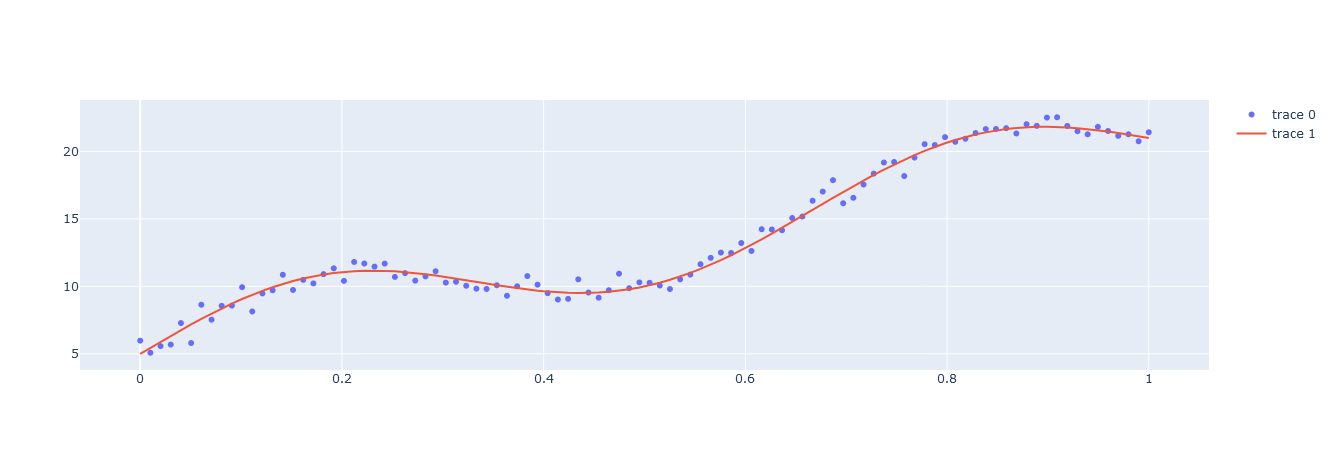

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["x"], y=df["y"], mode="markers"))
fig.add_trace(go.Scatter(x=df["x"], y=df["y_true"], mode="lines"))

In [76]:
m_smooth = (("s(1)", "none", 10, (0, 0), "equidistant"),)
m_wiggly = (("s(1)", "none", 50, (0, 0), "equidistant"),)
m_p = (("s(1)", "none", 50, (100, 0), "equidistant"),)


In [77]:
M_smooth = StarModel(description=m_smooth)
M_wiggly = StarModel(description=m_wiggly)
M_p = StarModel(description=m_p)

In [78]:
M_smooth.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_wiggly.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_p.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)

ypred_s = M_smooth.basis @ M_smooth.coef_
ypred_w = M_wiggly.basis @ M_wiggly.coef_
ypred_p = M_wiggly.basis @ M_wiggly.coef_

df_fit = pd.DataFrame(data={"fit_s":M_smooth.basis @ M_smooth.coef_, "fit_w":M_wiggly.basis @ M_wiggly.coef_, "fit_p": M_p.basis @ M_p.coef_})

dfp = pd.concat([df, df_fit], axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


### **Plot B-spline fit and basis functions**

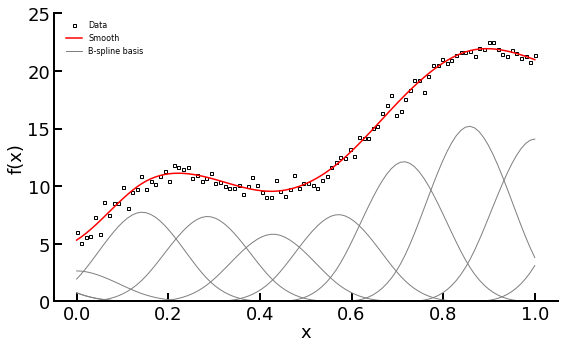

In [303]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0, 0, 1, 1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=3, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth")

for i in range(M_smooth.basis.shape[1]):
    ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))


ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=8)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\smooth_bf.pdf',  transparent=False, bbox_inches='tight')

### **Plot low and high number of splines**

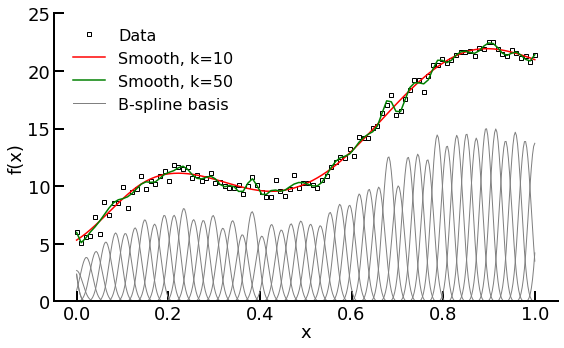

In [304]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth, k=10")
ax.plot(x, dfp["fit_w"], color="green", label="Smooth, k=50")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=M_wiggly.basis.shape[1])
for i in range(M_wiggly.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\smooth_wiggly_bf.pdf', transparent=False, bbox_inches='tight')

### **Plot P-splines for several $\lambda_s$ values**

In [107]:
n = 50
m_p_m2 = (("s(1)", "none", n, (10**-2, 0), "equidistant"),)
m_p_0 = (("s(1)", "none", n, (10**0, 0), "equidistant"),)
m_p_2 = (("s(1)", "none", n, (10**2, 0), "equidistant"),)
m_p_4 = (("s(1)", "none", n, (10**4, 0), "equidistant"),)
m_p_6 = (("s(1)", "none", n, (10**6, 0), "equidistant"),)
m_p_8 = (("s(1)", "none", n, (10**8, 0), "equidistant"),) 


M_p_m2 = StarModel(description=m_p_m2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_0 = StarModel(description=m_p_0).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_2 = StarModel(description=m_p_2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_4 = StarModel(description=m_p_4).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_6 = StarModel(description=m_p_6).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_8 = StarModel(description=m_p_8).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)

ypred_p_m2 = M_p_m2.basis @ M_p_m2.coef_
ypred_p_0 = M_p_0.basis @ M_p_0.coef_
ypred_p_2 = M_p_2.basis @ M_p_2.coef_
ypred_p_4 = M_p_4.basis @ M_p_4.coef_
ypred_p_6 = M_p_6.basis @ M_p_6.coef_
ypred_p_8 = M_p_8.basis @ M_p_8.coef_

df_ps = pd.DataFrame(data={"x":x, "y":y, "yp_m2":ypred_p_m2, "yp_0":ypred_p_0, "yp_2":ypred_p_2, "yp_4":ypred_p_4, "yp_6":ypred_p_6, "yp_8":ypred_p_8 })

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


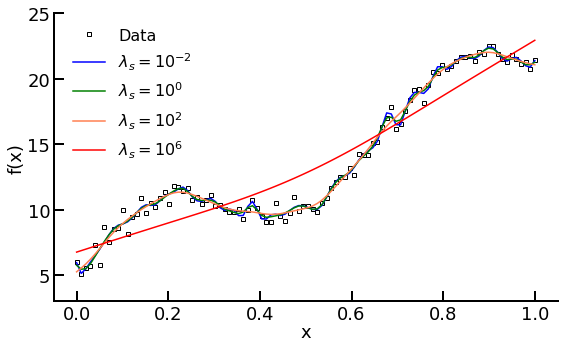

In [305]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)                                                            
ax.plot(x, df_ps["yp_m2"], color="blue", label=r"$\lambda_s = 10^{-2}$")
ax.plot(x, df_ps["yp_0"], color="green", label=r"$\lambda_s = 10^{0}$")
ax.plot(x, df_ps["yp_2"], color="coral", label=r"$\lambda_s = 10^{2}$")
ax.plot(x, df_ps["yp_6"], color="red", label=r"$\lambda_s = 10^{6}$")

       
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=3, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\p_splines.pdf', transparent=False, bbox_inches='tight')

## **Monotonicity constraint fit**

In [271]:
n = 30
m_base = (("s(1)", "none", n, (0.1, 0), "equidistant"),)
m_c = (("s(1)", "inc", n, (0.1, 6000), "equidistant"),)

Mbase = StarModel(description=m_base).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)
Mcon = StarModel(description=m_c).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)

ypred_b = Mbase.basis @ Mbase.coef_
ypred_c = Mcon.basis @ Mcon.coef_

df_c = pd.concat((df, pd.DataFrame(data={"yp_b":ypred_b, "yp_c":ypred_c})), axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


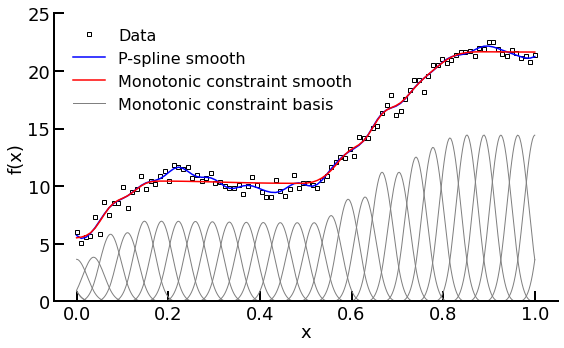

In [306]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, df_c["yp_b"], color="blue", label="P-spline smooth")
ax.plot(x, df_c["yp_c"], color="red", label="Monotonic constraint smooth")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=Mcon.basis.shape[1])
for i in range(Mcon.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1, label="Monotonic constraint basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\inc_spline.pdf', transparent=False, bbox_inches='tight')

## **2D Test Function**

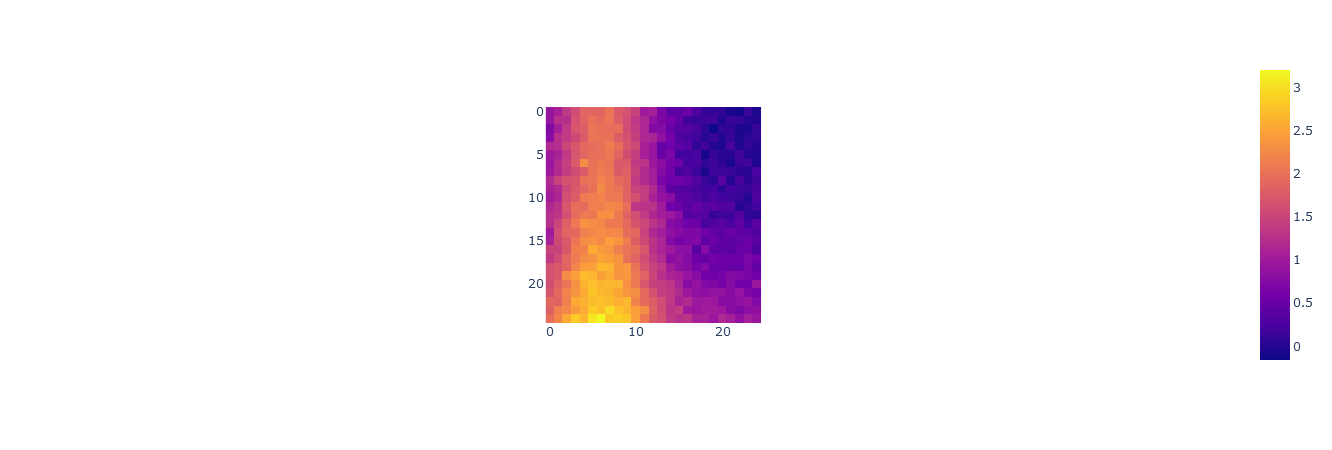

In [2]:
n = 25
x1, x2 = np.linspace(0,1,n), np.linspace(0,1,n)
x1g, x2g = np.meshgrid(x1, x2)
X = np.vstack((x1g.ravel(), x2g.ravel())).T
def f(x1, x2):
    return 2*np.exp(-((x1 - 0.25)**2/0.08)) + x2**2 + np.random.normal(loc=0.0, scale=0.1, size=x1.shape)
y2d = f(X[:,0], X[:,1])
df = {"x1":X[:,0], "x2":X[:,1], "y":y2d}
px.imshow(y2d.reshape(25,25))

In [3]:
m = ( ("s(1)", "peak", 50, (1, 6000), "equidistant"),
       ("s(2)", "inc", 50, (1, 6000), "equidistant"),
    )
M = StarModel(description=m)
M.fit(X=X, y=y2d, plot_=0, verbose=False, max_iter=5)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


StarModel(s(1)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50},
          s(2)={'constraint': 'inc', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50})

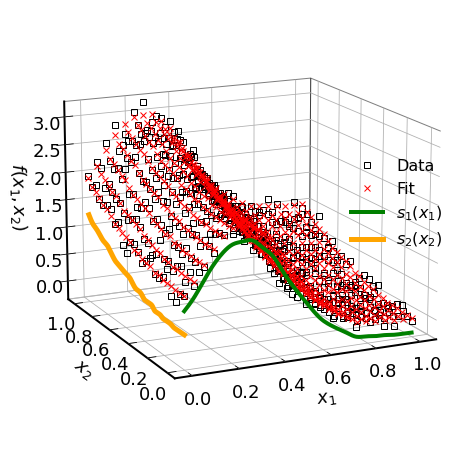

In [16]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')

ax.grid(True)
ax.xaxis.pane.set_edgecolor("black")
ax.yaxis.pane.set_edgecolor("black")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=15, azim=135+110)

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.zaxis.set_major_locator(MultipleLocator(0.5))

ax.plot(xs=X[:,0], ys=X[:,1], zs=y2d, marker="s", label="Data", color="black", markersize=6, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax.plot(xs=X[:,0], ys=X[:,1], zs=M.basis@M.coef_, label="Fit", marker="x", color="red", markersize=6, markerfacecolor='none', markeredgecolor="red", linewidth=0)

ax.set_xlabel(r"$x_1$", labelpad=10)
ax.set_ylabel(r"$x_2$", labelpad=10)
ax.set_zlabel(r"$f(x_1,x_2)$", labelpad=10)

xplot, B = np.linspace(0,1,200), Bspline()
B.bspline_basis(x_data=xplot, k=50)
ax.plot(xs=xplot, ys=np.zeros(200), zs=B.basis@M.smooths["s(1)"].coef_, linewidth=4, label=r"$s_1(x_1)$", color="green")
ax.plot(xs=np.zeros(200), ys=xplot, zs=B.basis@M.smooths["s(2)"].coef_, linewidth=5, label=r"$s_2(x_2)$", color="orange")
#ax.plot(xs=x1g.ravel(), ys=x2g.ravel(), zs=M.smooths["t(1,2)"].basis@M.smooths["t(1,2)"].coef_)

ax.legend(bbox_to_anchor=(0.995, 0.685), loc="upper right", frameon=False, fontsize=16)

plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\2d_example.pdf', transparent=False, bbox_inches='tight')

### **Linear and quadratic Splines**

In [160]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from stareg.bspline import Bspline

x = np.linspace(0,1,1000)
Blin, Bquad, Bcubic = Bspline(), Bspline(), Bspline()
Blin.bspline_basis(x_data=x, k=10, m=0, type_="equidistant")
Bquad.bspline_basis(x_data=x, k=10, m=1, type_="equidistant")
Bcubic.bspline_basis(x_data=x, k=10, m=2)

[Text(0.375, 0, '$x_1$'),
 Text(0.5, 0, '$x_2$'),
 Text(0.625, 0, '$x_3$'),
 Text(0.75, 0, '$x_4$')]

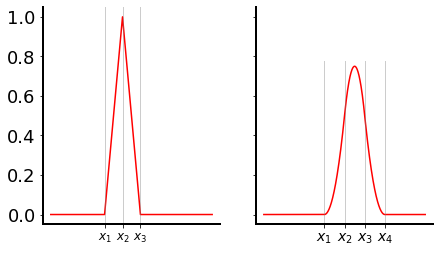

In [161]:
# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
# Customized the left plot
ax1.plot(x, Blin.basis[:,6], color="red", label=r"Spline")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.axvline(Blin.knots[6], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[7], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[8], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.set_xticks([Blin.knots[6], Blin.knots[7], Blin.knots[8]])
ax1.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$"], size=12)

# Customize the right plot
ax2.plot(x, Bquad.basis[:,6], color="red", label=r"Spline")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.axvline(Bquad.knots[6], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[7], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[8], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[9], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.set_xticks([Bquad.knots[6],Bquad.knots[7],Bquad.knots[8], Bquad.knots[9]])
ax2.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$", r"$x_4$"], size=14)

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\Thesis_WorkingDirectoryplots\\linear_and_quadratic_spline.pdf', transparent=False, bbox_inches='tight')

In [3]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## **STATIC FUNCTION FITTING 1** 

**Example with a knick**

In [153]:
from stareg.bspline import Bspline
# generate some data
n = 1000
x = np.linspace(0,3,n)
knick = 1.2
noise = np.random.normal(loc=0.0, scale=0.05, size=n)

y = np.array([0 if x <= knick else np.sin(x-knick) for x in x])
yn = y + noise

df = pd.DataFrame(data=dict(x=x, y=y, yn=yn))

In [202]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [193]:
# Unconstraint Model
m_unc = (("s(1)", "none", 35, (1, 1000), "equidistant"),)
M_unc = StarModel(description=m_unc)
M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], n_grid=25)
best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
yfit_unc = M_unc.basis @ M_unc.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
ypred_unc = B.basis @ M_unc.coef_


Best smoothing paramter found is {'smoothness': 9.0852, 'constraint': 9085.2}


In [140]:
# Constraint Model
m = (("s(1)", "inc", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con = StarModel(description=m)

M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con = M_con.basis @ M_con.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
ypred_con = B.basis @ M_con.coef_


In [196]:
print("".center(50, "-"))
print("MSE unconstraint on noisy samples: ".ljust(35), mean_squared_error(df_train["yn"], yfit_unc).round(8))
print("MSE constraint on noisy samples: ".ljust(35), mean_squared_error(df_train["yn"], yfit_con).round(8))
print("".center(50, "-"))
print("MSE unconstraint on true function: ".ljust(35), mean_squared_error(df_train["y"], yfit_unc).round(8))
print("MSE constraint on true function: ".ljust(35), mean_squared_error(df_train["y"], yfit_con).round(8))
print("".center(50, "-"))
print("MSE unconstraint on test set: ".ljust(35), mean_squared_error(df_test["yn"], ypred_unc).round(8))
print("MSE constrain on test set: ".ljust(35), mean_squared_error(df_test["yn"], ypred_con).round(8))

--------------------------------------------------
MSE unconstraint on noisy samples:  0.00260087
MSE constraint on noisy samples:    0.00264124
--------------------------------------------------
MSE unconstraint on true function:  7.396e-05
MSE constraint on true function:    5.976e-05
--------------------------------------------------
MSE unconstraint on test set:       0.00228179
MSE constrain on test set:          0.0022334


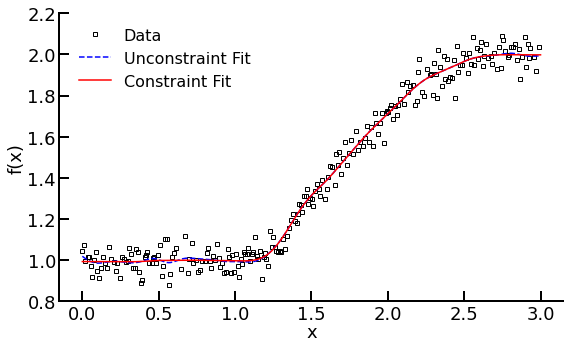

In [200]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(df_train["x"][::3], df_train["yn"][::3], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(df_train["x"], M_unc.basis @ M_unc.coef_, color="blue", label="Unconstraint Fit", linestyle="--")
ax.plot(df_train["x"], M_con.basis @ M_con.coef_, color="red", label="Constraint Fit")
 
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0.8, top=2.2)

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

# plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_inc1.pdf', transparent=False, bbox_inches='tight')

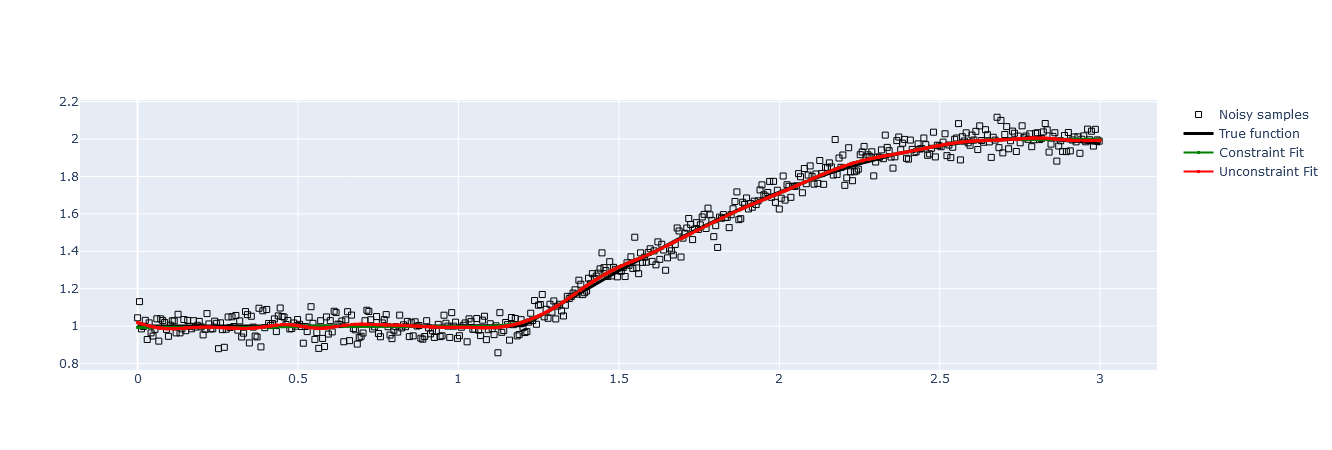

In [144]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x[::2], y=yn[::2], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
fig.add_trace(go.Scatter(x=x, y=y, mode="lines", line=dict(width=3, color="black"), name="True function"))
fig.add_trace(go.Scatter(x=df_train["x"], y=ypred_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="Constraint Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=ypred_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
# fig.write_image("example_inc.png")


## **STATIC FUNCTION FITTING 2**

**Gauss + Linear**

In [395]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import colorednoise as cn

In [396]:
n = 500
x = np.linspace(0,1,n)
noise = np.random.normal(loc=0.0, scale=0.1, size=n)

y = 2*np.exp(-(x-0.5)**2 / 0.05) + 2.5*x
yn = y + noise

df = pd.DataFrame(data=dict(x=x, y=y, yn=yn))

In [397]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [398]:
df_train.max()

x     1.000000
y     3.289405
yn    3.552974
dtype: float64

In [399]:
# Unconstraint Model
m_unc = (("s(1)", "none", 35, (1, 1000), "equidistant"),)
M_unc = StarModel(description=m_unc)
M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], n_grid=25)
best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
yfit_unc = M_unc.basis @ M_unc.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
ypred_unc = B.basis @ M_unc.coef_


Best smoothing paramter found is {'smoothness': 1.2115, 'constraint': 1211.5}


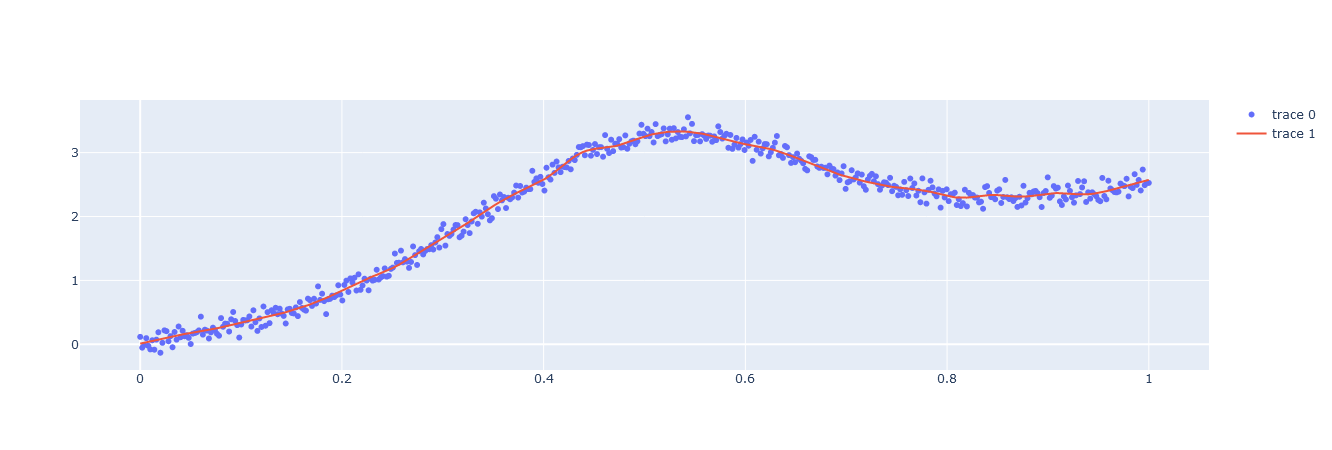

In [400]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yn, mode="markers"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc))

In [382]:
# Constraint Model peak
m = (("s(1)", "peak", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con_peak = StarModel(description=m)

M_con_peak.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con_peak = M_con_peak.basis @ M_con_peak.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_con_peak.coef_list[-1])
ypred_con_peak = B.basis @ M_con_peak.coef_


In [383]:
# Constraint Model peak
m = (("s(1)", "conc", 35, (best_lam_s, best_lam_s*1000), "equidistant"), )
M_con_concave = StarModel(description=m)

M_con_concave.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["yn"], plot_=False)
yfit_con_concave = M_con_concave.basis @ M_con_concave.coef_

B = Bspline()
B.bspline_basis(x_data=df_test["x"].values, k=M_con_concave.coef_list[-1])
ypred_con_concave = B.basis @ M_con_concave.coef_


In [384]:
print("".center(50, "-"))
print("MSE unconstraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_unc).round(8))
print("MSE concave constraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_con_concave).round(8))
print("MSE peak constraint on noisy samples: ".ljust(42), mean_squared_error(df_train["yn"], yfit_con_peak).round(8))
print("".center(50, "-"))
print("MSE unconstraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_unc).round(8))
print("MSE concave constraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_con_concave).round(8))
print("MSE peak constraint on true function: ".ljust(42), mean_squared_error(df_train["y"], yfit_con_peak).round(8))
print("".center(50, "-"))
print("MSE unconstraint on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_unc).round(8))
print("MSE concave constrait on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_con_concave).round(8))
print("MSE peak constrait on test set: ".ljust(42), mean_squared_error(df_test["yn"], ypred_con_peak).round(8))


--------------------------------------------------
MSE unconstraint on noisy samples:         0.00862786
MSE concave constraint on noisy samples:   0.00995325
MSE peak constraint on noisy samples:      0.00931174
--------------------------------------------------
MSE unconstraint on true function:         0.00080751
MSE concave constraint on true function:   0.00075285
MSE peak constraint on true function:      0.00090407
--------------------------------------------------
MSE unconstraint on test set:              0.10109949
MSE concave constrait on test set:         0.10120349
MSE peak constrait on test set:            0.10201514


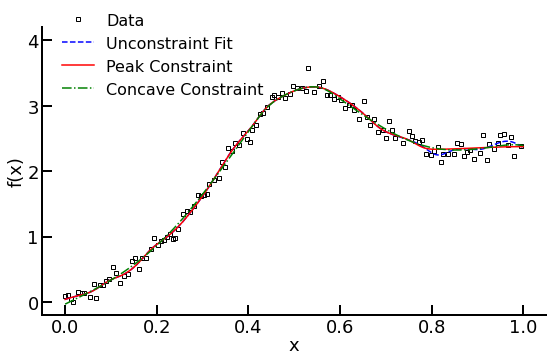

In [394]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(df_train["x"][::3], df_train["yn"][::3], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(df_train["x"], M_unc.basis @ M_unc.coef_, color="blue", label="Unconstraint Fit", linestyle="--")
ax.plot(df_train["x"], M_con_peak.basis @ M_con_peak.coef_, color="red", label="Peak Constraint")
ax.plot(df_train["x"], M_con_concave.basis @ M_con_concave.coef_, color="green", label="Concave Constraint", linestyle="-.")

#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=-0.2, top=4.2)

ax.legend(bbox_to_anchor=(0.01, 1.1), loc="upper left", frameon=False, fontsize=16)

# plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_peak1.png', transparent=False, bbox_inches='tight')

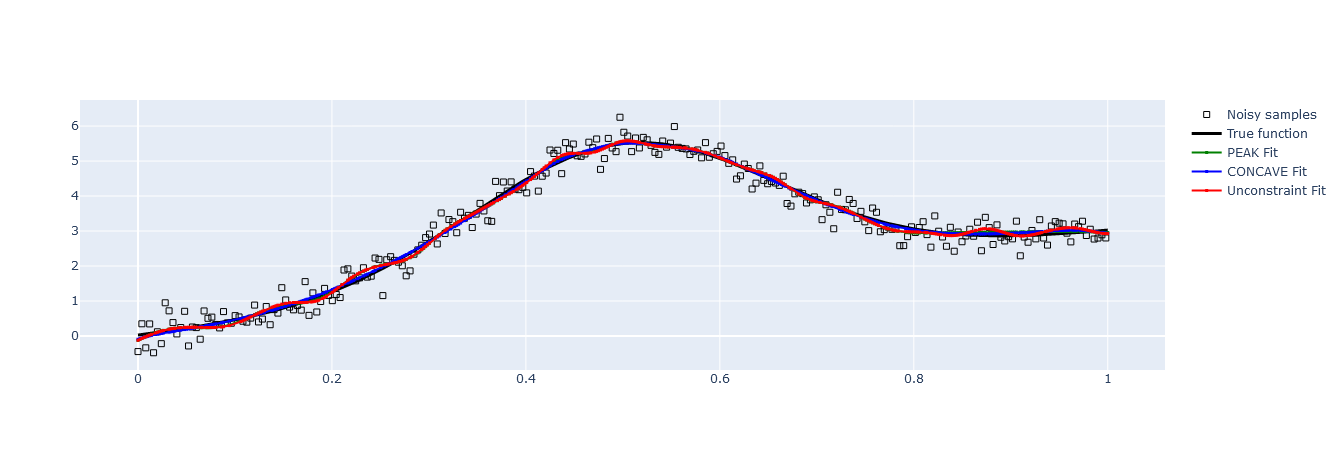

In [354]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x[::2], y=yn[::2], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
fig.add_trace(go.Scatter(x=x, y=y, mode="lines", line=dict(width=3, color="black"), name="True function"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con_peak, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="PEAK Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con_concave, mode="markers+lines", marker=dict(size=3, symbol=1, color="blue"), name="CONCAVE Fit"))
fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
# fig.write_image("example_inc.png")


## **Constraint vs. Noise**

In [4]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel
from stareg.bspline import Bspline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import colorednoise as cn

### **Noise Levels**

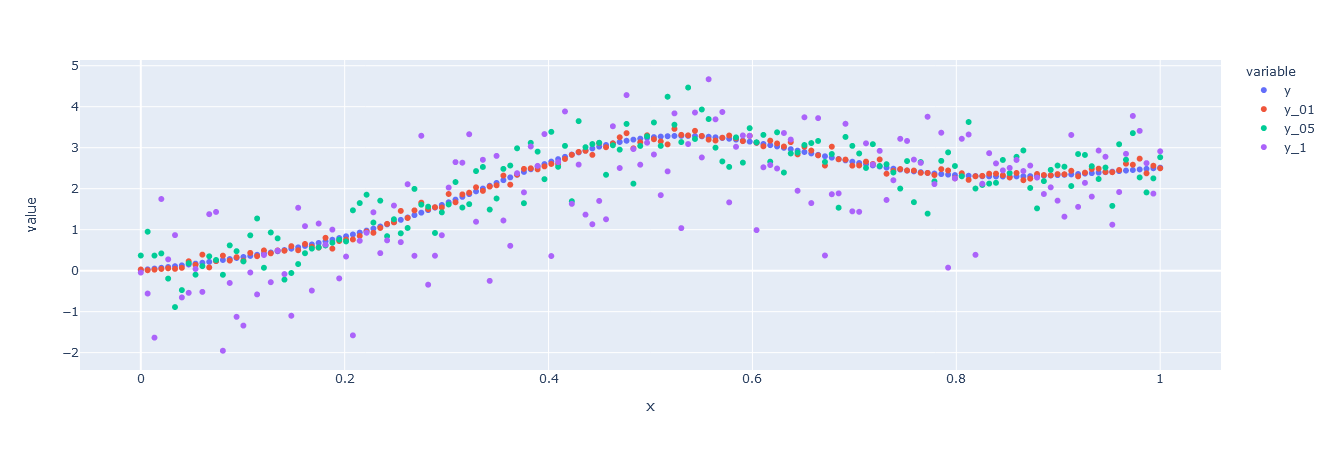

In [3]:
n = 150
x = np.linspace(0,1,n)

noise_01 = np.random.normal(loc=0.0, scale=0.1, size=n)
noise_05 = np.random.normal(loc=0.0, scale=0.5, size=n)
noise_1  = np.random.normal(loc=0.0, scale=1, size=n)

y = 2*np.exp(-(x-0.5)**2 / 0.05) + 2.5*x

df = pd.DataFrame(data=dict(x=x, y=y, y_01=y+noise_01, y_05=y+noise_05, y_1=y+noise_1))
px.scatter(df, x="x", y=["y", "y_01", "y_05", "y_1"], width=10)

In [4]:
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [6]:
df_train.max()

x       1.000000
y       3.289349
y_01    3.459870
y_05    4.467059
y_1     4.283794
dtype: float64

Best smoothing paramter found is {'smoothness': 68.1292, 'constraint': 68129.2}


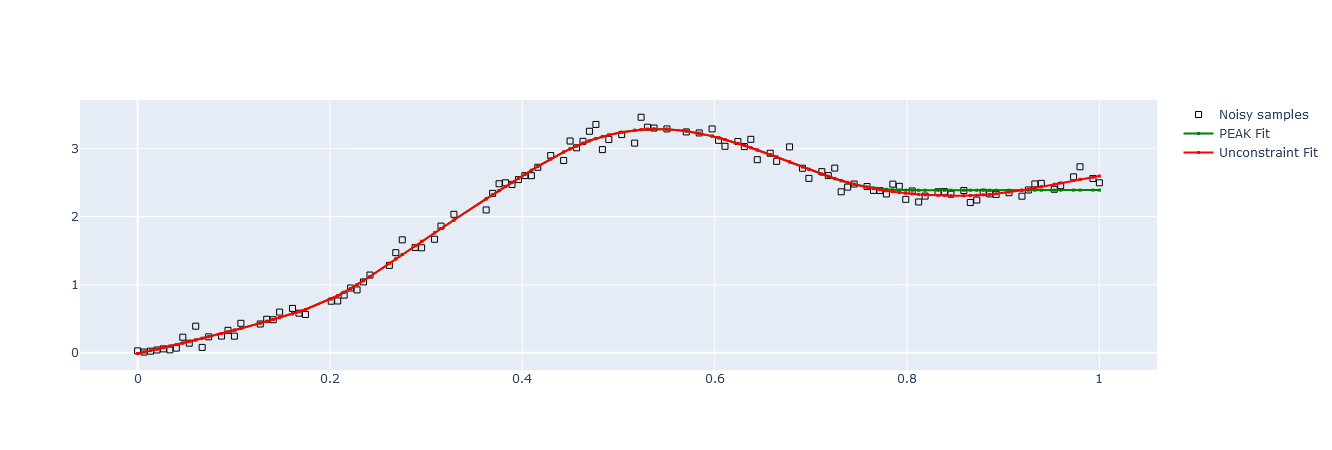

Best smoothing paramter found is {'smoothness': 2.3714, 'constraint': 2371.4}
Smoothing Parameter low -> lam_c set to 6000!


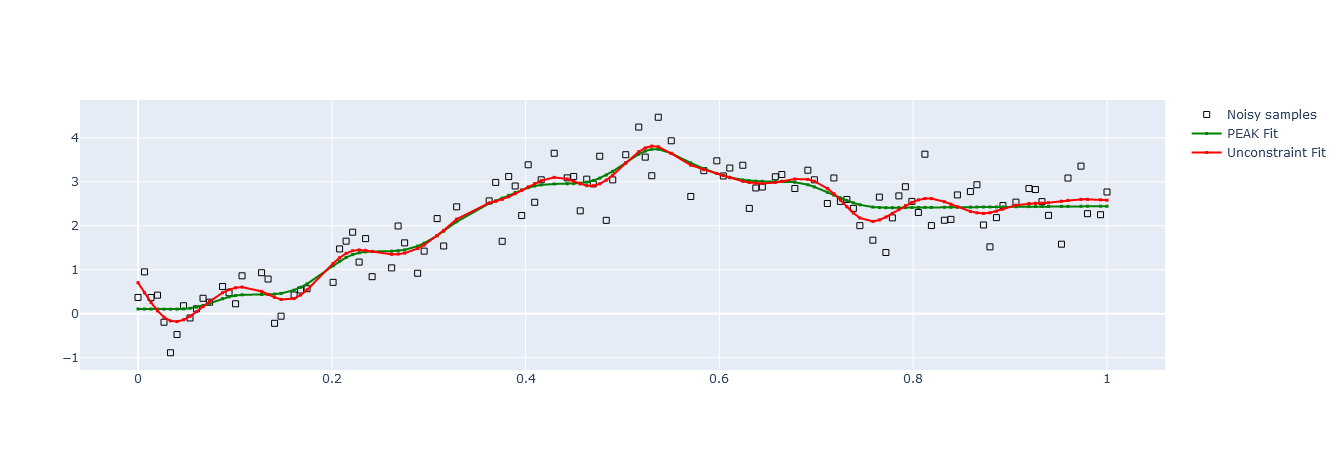

Best smoothing paramter found is {'smoothness': 1000.0, 'constraint': 1000000.0}


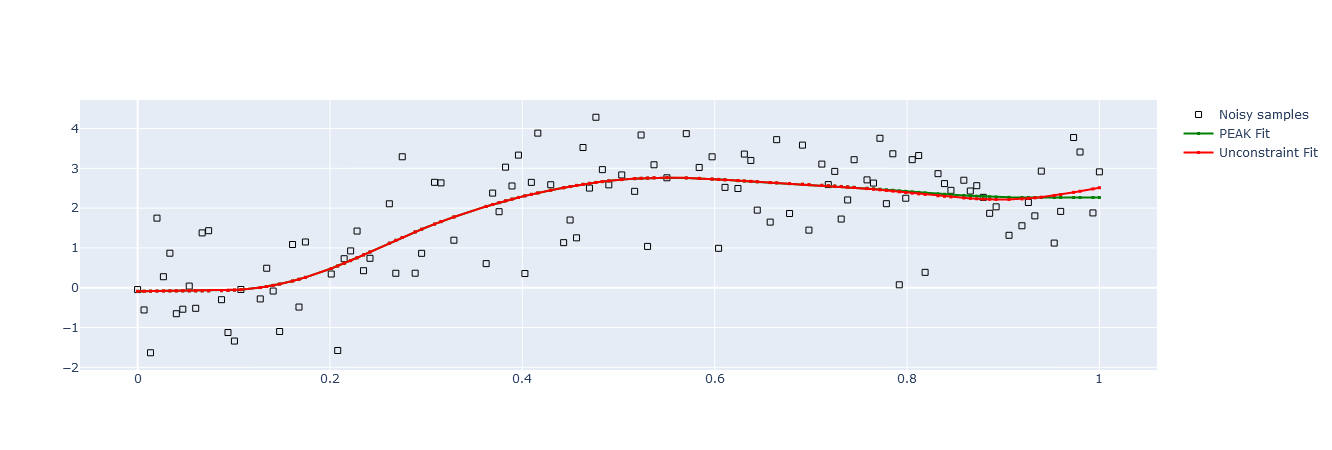

In [10]:
for noise in ["0.01", "0.05", "0.1"]:
# Unconstraint Model
    m_unc = (("s(1)", "none", 35, (1, 0), "equidistant"),)
    M_unc = StarModel(description=m_unc)
    M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+noise[2:]], n_grid=25)
    best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
    lam_c = 1000*best_lam_s
    print(f"Best smoothing paramter found is {M_unc.smooths['s(1)'].lam}")
    yfit_unc = M_unc.basis @ M_unc.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
    ypred_unc = B.basis @ M_unc.coef_

    if best_lam_s < 6:
        best_lam_s = 6
        lam_c = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")
    
    # Constraint Model peak
    m_con = (("s(1)", "peak", 35, (best_lam_s, lam_c), "equidistant"), )
    M_con = StarModel(description=m_con)

    M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+noise[2:]], plot_=False)
    yfit_con = M_con.basis @ M_con.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_con.coef_list[-1])
    ypred_con = B.basis @ M_con.coef_

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["x"], y=df_train["y_"+noise[2:]], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="PEAK Fit"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    fig.show()

    df_train["fit_unc_"+noise[2:]] = yfit_unc
    df_train["fit_con_"+noise[2:]] = yfit_con
    df_test["pred_unc_"+noise[2:]] = ypred_unc
    df_test["pred_con_"+noise[2:]] = ypred_con


In [13]:
df_train.head()

,x,y,y_01,y_05,y_1,fit_unc_01,fit_con_01,fit_unc_05,fit_con_05,fit_unc_1,fit_con_1
0,0.000000,0.013476,0.028783,0.369188,-0.046733,-0.009895,-0.009895,0.705384,0.106921,-0.089493,-0.091337
1,0.006711,0.032176,0.010863,0.951329,-0.558512,0.011199,0.011199,0.476135,0.106231,-0.087088,-0.088726
2,0.013423,0.051119,0.024449,0.367894,-1.634031,0.032487,0.032487,0.256781,0.105429,-0.084879,-0.086309
3,0.020134,0.070331,0.041779,0.421492,1.748770,0.054018,0.054018,0.065132,0.104596,-0.082958,-0.084176
4,0.026846,0.089838,0.058071,-0.193802,0.276239,0.075843,0.075843,-0.081001,0.103815,-0.081417,-0.082417


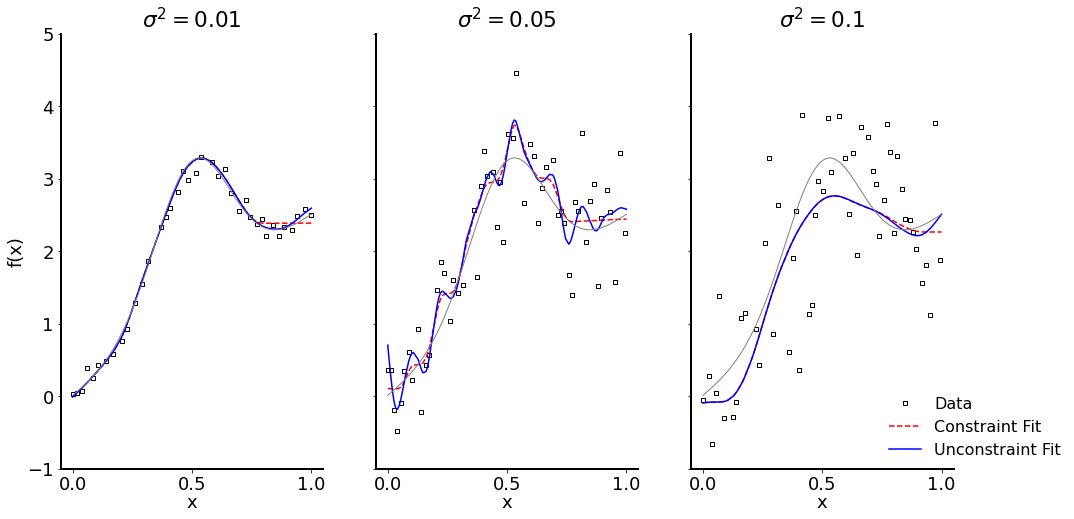

In [21]:
# Create two subplots 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
# Customized the left plot
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["x"][::3], df_train["y_01"][::3], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["x"], df_train["fit_con_01"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["x"], df_train["fit_unc_01"], color="blue", label="Unconstraint Fit")
ax1.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax1.set_title(r"$\sigma^2=0.01$")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-0.4, top=4.2)

# Customized the middle plot
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["x"][::2], df_train["y_05"][::2], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["x"], df_train["fit_con_05"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["x"], df_train["fit_unc_05"], color="blue", label="Unconstraint Fit")
ax2.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax2.set_title(r"$\sigma^2=0.05$")
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-0.4, top=4.2)

# Customized the left plot
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

ax3.plot(df_train["x"][::2], df_train["y_1"][::2], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax3.plot(df_train["x"], df_train["fit_con_1"], color="red", label="Constraint Fit", linestyle="--")
ax3.plot(df_train["x"], df_train["fit_unc_1"], color="blue", label="Unconstraint Fit")
ax3.plot(df_train["x"], df_train["y"], color="grey", linewidth=1)
ax3.set_title(r"$\sigma^2=0.1$")
ax3.set_xlabel("x", labelpad=0)
ax3.set_ylim(bottom=-1, top=5)

ax3.legend(bbox_to_anchor=(0.7, 0.2), loc="upper left", frameon=False, fontsize=16)
#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_noise_levels.png', transparent=False, bbox_inches='tight')

### **Noise Colors**

In [77]:
# generate some data
n = 1000
x = np.linspace(0,3,n)
knick = 1.2

y = 20*np.array([0 if x <= knick else np.sin(x-knick) for x in x])

noise_white = cn.powerlaw_psd_gaussian(exponent=0, size=n)
noise_pink = cn.powerlaw_psd_gaussian(exponent=1, size=n)
noise_brownian = cn.powerlaw_psd_gaussian(exponent=2, size=n)

In [78]:
df = pd.DataFrame(data=dict(x=x, y=y, y_white=y+noise_white, y_pink=y+noise_pink, y_brownian=y+noise_brownian))
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [79]:
df_train.min()

x             0.000000
y             0.000000
y_white      -2.393439
y_pink       -2.189358
y_brownian   -1.821323
dtype: float64

In [61]:
df_train.describe()

,x,y,y_white,y_pink,y_brownian
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1.643133,9.556464,9.529225,9.362846,10.216319
std,0.903798,8.443542,8.265055,8.364287,8.070867
min,0.000000,0.000000,-0.808982,-1.862404,-0.576223
25%,0.979592,0.000000,0.959159,0.715583,1.911791
50%,1.714286,9.838262,8.745429,10.986002,10.178392
75%,2.387755,18.550646,18.392089,18.237963,18.853699
max,3.000000,19.997537,20.728028,20.589955,20.667574


### **White, Pink and Brownian Noise**

Best smoothing parameter for noise color white found is {'smoothness': 9.0852, 'constraint': 9085.2}


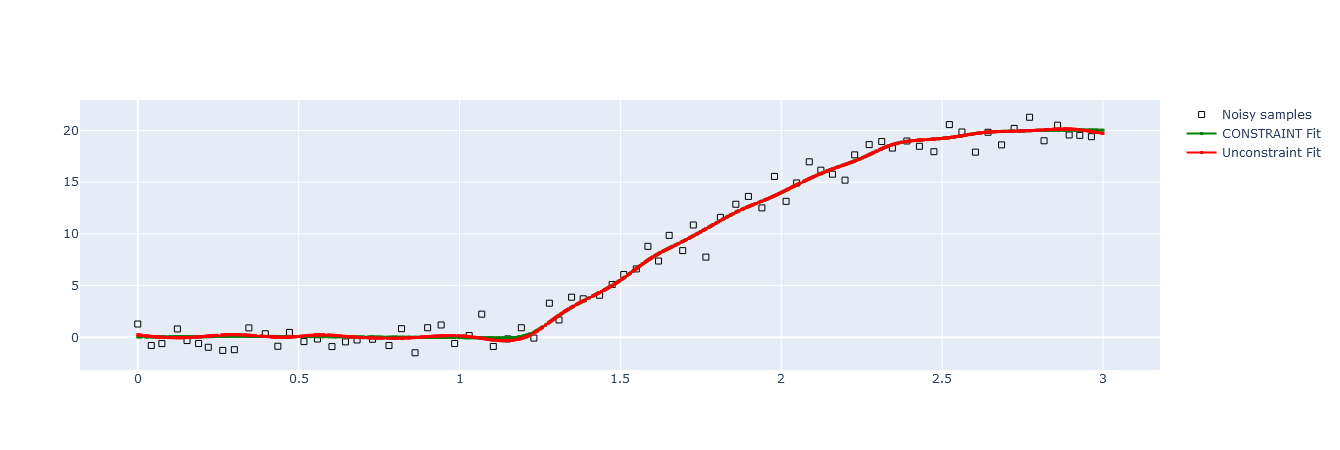

Best smoothing parameter for noise color pink found is {'smoothness': 0.3162, 'constraint': 316.2}
Smoothing Parameter low -> lam_c set to 6000!


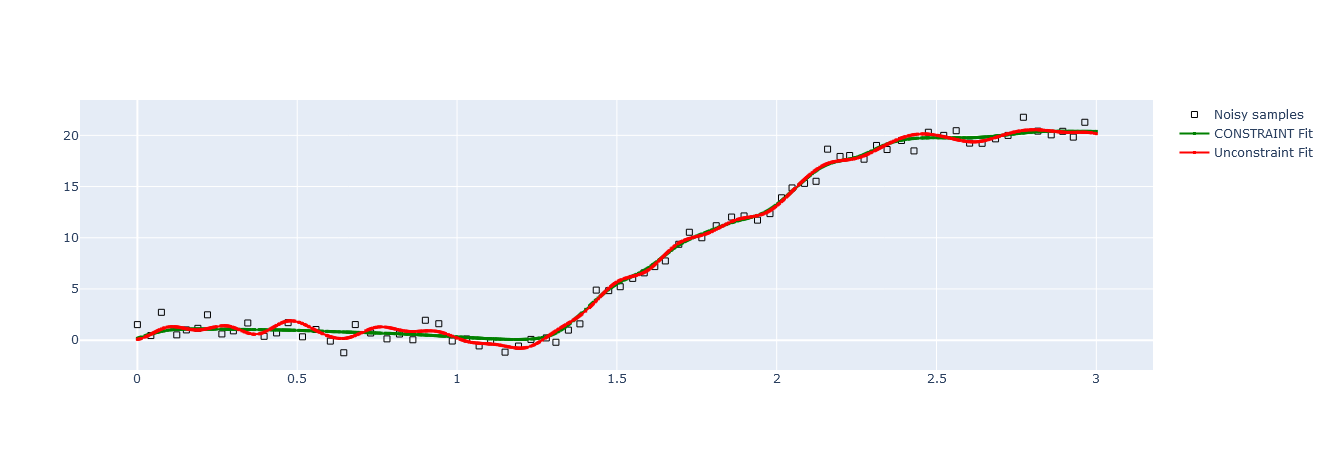

Best smoothing parameter for noise color brownian found is {'smoothness': 0.0056, 'constraint': 5.6}
Smoothing Parameter low -> lam_c set to 6000!


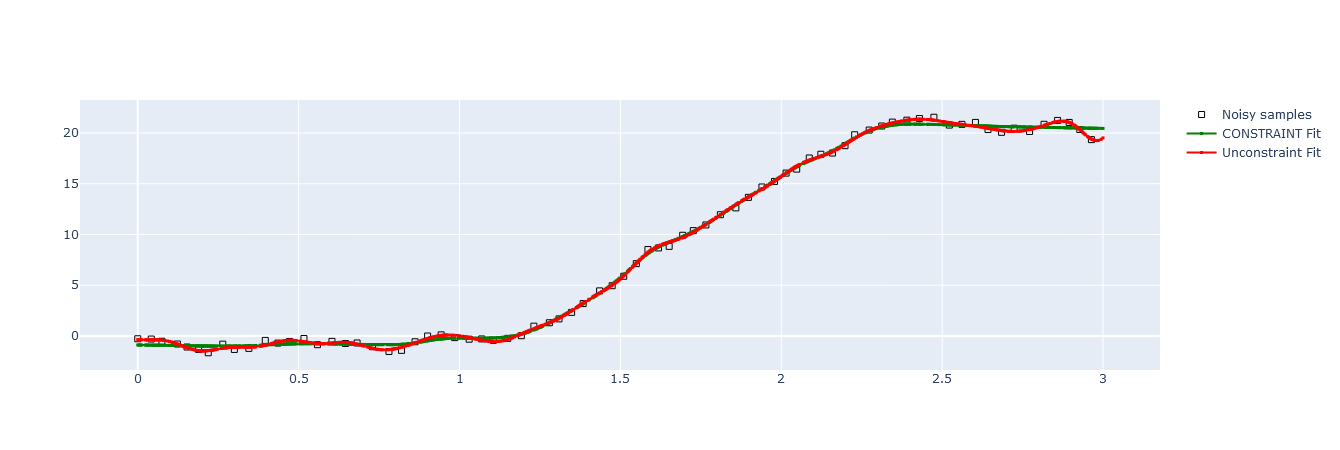

In [87]:
for color in ["white", "pink", "brownian"]:
# Unconstraint Model
    m_unc = (("s(1)", "none", 35, (1, 0), "equidistant"),)
    M_unc = StarModel(description=m_unc)
    M_unc.GCV_smoothingParameter(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+color], n_grid=25)
    best_lam_s = M_unc.smooths["s(1)"].lam["smoothness"]
    lam_c = 1000*best_lam_s
    print(f"Best smoothing parameter for noise color {color} found is {M_unc.smooths['s(1)'].lam}")
    yfit_unc = M_unc.basis @ M_unc.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_unc.coef_list[-1])
    ypred_unc = B.basis @ M_unc.coef_

    # Constraint Model peak
    if best_lam_s < 6:
        best_lam_s = 6
        lam_c = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")
    m_con = (("s(1)", "inc", 35, (best_lam_s, lam_c), "equidistant"), )
    M_con = StarModel(description=m_con)

    M_con.fit(X=df_train["x"].values.reshape(-1,1), y=df_train["y_"+color], plot_=False)
    yfit_con = M_con.basis @ M_con.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["x"].values, k=M_con.coef_list[-1])
    ypred_con = B.basis @ M_con.coef_

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_train["x"][::10], y=df_train["y_"+color][::10], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))

    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_con, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["x"], y=yfit_unc, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    fig.show()
    df_train["fit_unc_"+color] = yfit_unc
    df_train["fit_con_"+color] = yfit_con
    df_test["pred_unc_"+color] = ypred_unc
    df_test["pred_con_"+color] = ypred_con
    # fig.write_image("example_inc.png")

### **True function in die Plots oder nicht?**

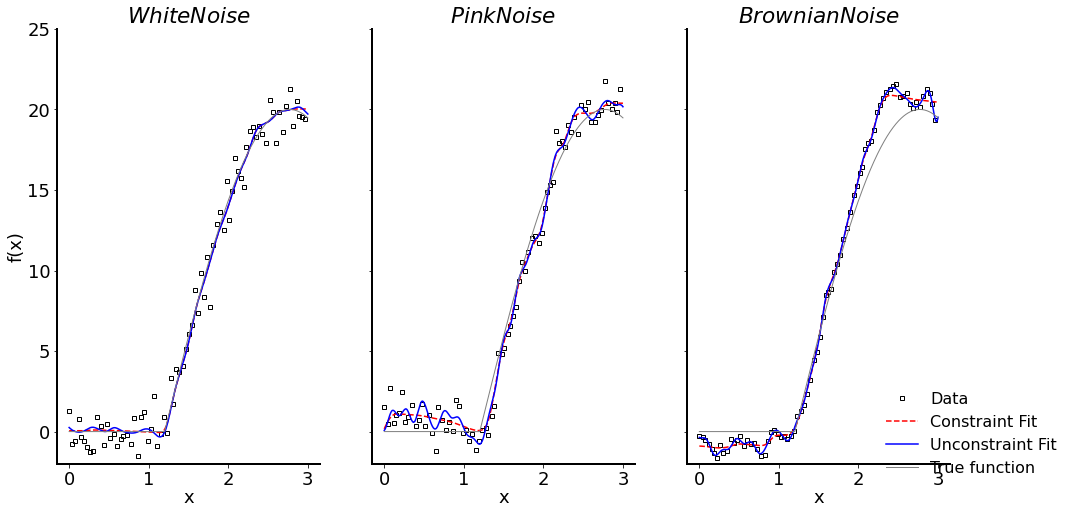

In [88]:
n_ = 10
# Create two subplots 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
# Customized the left plot
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["x"][::n_], df_train["y_white"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["x"], df_train["fit_con_white"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["x"], df_train["fit_unc_white"], color="blue", label="Unconstraint Fit")
ax1.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax1.set_title(r"$White Noise$")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-2, top=25)

# Customized the middle plot
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["x"][::n_], df_train["y_pink"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["x"], df_train["fit_con_pink"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["x"], df_train["fit_unc_pink"], color="blue", label="Unconstraint Fit")
ax2.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax2.set_title(r"$Pink Noise$")
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-2, top=25)

# Customized the left plot
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

ax3.plot(df_train["x"][::n_], df_train["y_brownian"][::n_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax3.plot(df_train["x"], df_train["fit_con_brownian"], color="red", label="Constraint Fit", linestyle="--")
ax3.plot(df_train["x"], df_train["fit_unc_brownian"], color="blue", label="Unconstraint Fit")
ax3.plot(df_train["x"], df_train["y"], color="grey", label="True function", linewidth=1)
ax3.set_title(r"$Brownian Noise$")
ax3.set_xlabel("x", labelpad=0)
ax3.set_ylim(bottom=-2, top=25)

ax3.legend(bbox_to_anchor=(0.7, 0.2), loc="upper left", frameon=False, fontsize=16)
#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_noise_colors.png', transparent=False, bbox_inches='tight')

## **BULK vs. EQUIDISTANT DATA**

In [ ]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
from stareg.utils import check_constraint
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
import os
from copy import deepcopy
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

from pyinputplus import inputChoice, inputMenu
from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

## **Generate some Data**

In [93]:
n = int(inputMenu(choices=["250", "2500"], prompt="Choose the number of datapoints:\n", lettered=True))
experiment = inputMenu(choices=["l", "m", "r"], prompt="Choose the data distribution:\n",lettered=True)

Choose the number of datapoints:
A. 250
B. 2500


 250


Choose the data distribution:
A. l
B. m
C. r


Blank values are not allowed.
Choose the data distribution:
A. l
B. m
C. r


 l


Specify the random seed!
A. 1
B. 2


 2


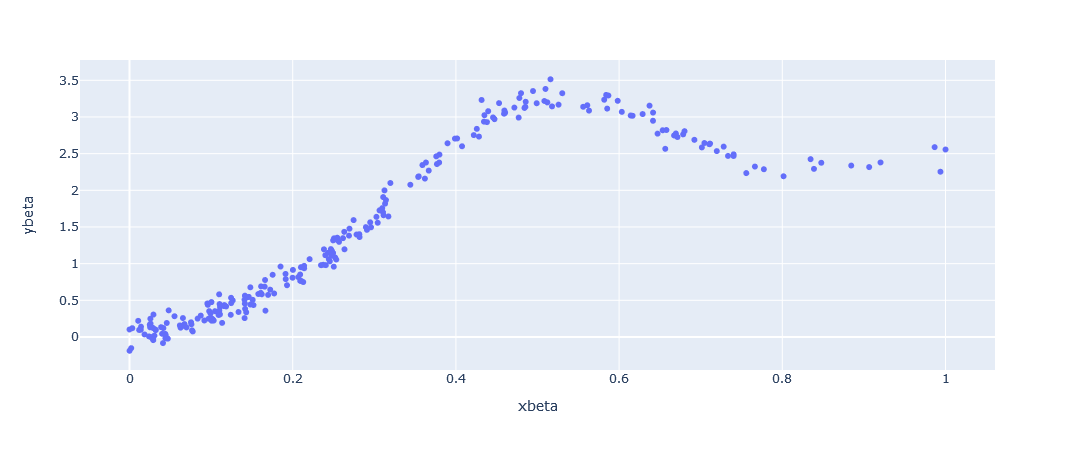

In [101]:
seed = int(inputMenu(choices=["1", "2"], prompt="Specify the random seed!\n", lettered=True))
np.random.seed(seed)

xlin = np.linspace(0,1,n)

if experiment=="l":
    beta_a, beta_b = 1, 3
elif experiment=="m":
    beta_a, beta_b = 3, 3
elif experiment=="r":
    beta_a, beta_b = 3, 1

xbeta = np.random.beta(a=beta_a, b=beta_b, size=n)
# normalized the beta distribution
xbeta = (xbeta - xbeta.min()) / (xbeta.max() - xbeta.min()) 
xbeta.sort()
noise = np.random.normal(loc=0.0, scale=0.1, size=n)

ylin = 2*np.exp(-(xlin-0.5)**2 / 0.05) + 2.5*xlin
ybeta = 2*np.exp(-(xbeta-0.5)**2 / 0.05) + 2.5*xbeta

df = pd.DataFrame(data=dict(xlin=xlin, xbeta=xbeta, y=ylin, ylin=ylin+noise, ybeta=ybeta+noise))
#px.scatter(df, x="xlin", y=["y", "ylin"], width=10).show()
px.scatter(df, x="xbeta", y="ybeta", width=10).show()
# train-test split
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)
df_train = df_train.sort_index()
df_test = df_test.sort_index()

## **Equidistant vs. Quantile Based for BETA-DISTRIBUTION DATA**

In [104]:
n_param = 35
Models_beta = []
print("Beta distribution data")
for grid in ["equidistant", "quantile"]:
    print("\nFit for ", grid)
    m_unc_beta = (("s(1)", "none", n_param, (1, 0), grid),)
    M_unc_beta = StarModel(description=m_unc_beta)
    M_unc_beta.GCV_smoothingParameter(X=df_train["xbeta"].values.reshape(-1,1), y=df_train["ybeta"], 
                                      n_grid=25)
    best_lam_s_beta = M_unc_beta.smooths["s(1)"].lam["smoothness"]
    lam_c_beta = 1000*best_lam_s_beta
    print(f"Best smoothing parameter for {grid} is {M_unc_beta.smooths['s(1)'].lam}")
    
    M_unc_beta = StarModel(description=(("s(1)", "none", n_param, (best_lam_s_beta, 0), grid),))
    M_unc_beta.fit(X=df_train["xbeta"].values.reshape(-1,1), y=df_train["ybeta"],plot_=False)
    yfit_unc_beta = M_unc_beta.basis @ M_unc_beta.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xbeta"].values, k=M_unc_beta.coef_list[-1])
    ypred_unc = B.basis @ M_unc_beta.coef_

    if best_lam_s_beta < 6 or best_lam_s_beta > 20 or True:
        #best_lam_s_beta = 6
        lam_c_beta = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")

    # Constraint Model peak
    m_con_beta = (("s(1)", "peak", n_param, (best_lam_s_beta, lam_c_beta), grid), )
    M_con_beta = StarModel(description=m_con_beta)

    M_con_beta.fit(X=df_train["xbeta"].values.reshape(-1,1), y=df_train["ybeta"], plot_=False)
    yfit_con_beta = M_con_beta.basis @ M_con_beta.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xbeta"].values, k=M_con_beta.coef_list[-1])
    ypred_con_beta = B.basis @ M_con_beta.coef_
    
    df_train["fit_unc_beta_"+grid] = yfit_unc_beta
    df_train["fit_con_beta_"+grid] = yfit_con_beta
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=df_train["ybeta"], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=yfit_con_beta, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["xbeta"], y=yfit_unc_beta, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    for i in range(M_con_beta.basis.shape[1]):
        fig.add_trace(go.Scatter(x=df_train["xbeta"], y=M_con_beta.basis[:,i] * M_con_beta.coef_[i], mode="lines", line=dict(color="grey", width=1), name=None))
    #fig.show()
    Models_beta.append(M_con_beta)
    

print("Equidistant knot Model: ".center(50, "-"), "\n", Models_beta[0])
print("Quantile knot Model: ".center(50, "-"), "\n", Models_beta[1])

Beta distribution data

Fit for  equidistant
Best smoothing parameter for equidistant is {'smoothness': 9.0852, 'constraint': 9085.2}
Smoothing Parameter low -> lam_c set to 6000!

Fit for  quantile
Best smoothing parameter for quantile is {'smoothness': 0.619, 'constraint': 619.0}
Smoothing Parameter low -> lam_c set to 6000!
-------------Equidistant knot Model: ------------- 
 {'s(1)': {'constraint': 'peak',
          'knot_type': 'equidistant',
          'lam': {'constraint': 6000, 'smoothness': 9.0852},
          'n_param': 35}}
--------------Quantile knot Model: --------------- 
 {'s(1)': {'constraint': 'peak',
          'knot_type': 'quantile',
          'lam': {'constraint': 6000, 'smoothness': 0.619},
          'n_param': 35}}


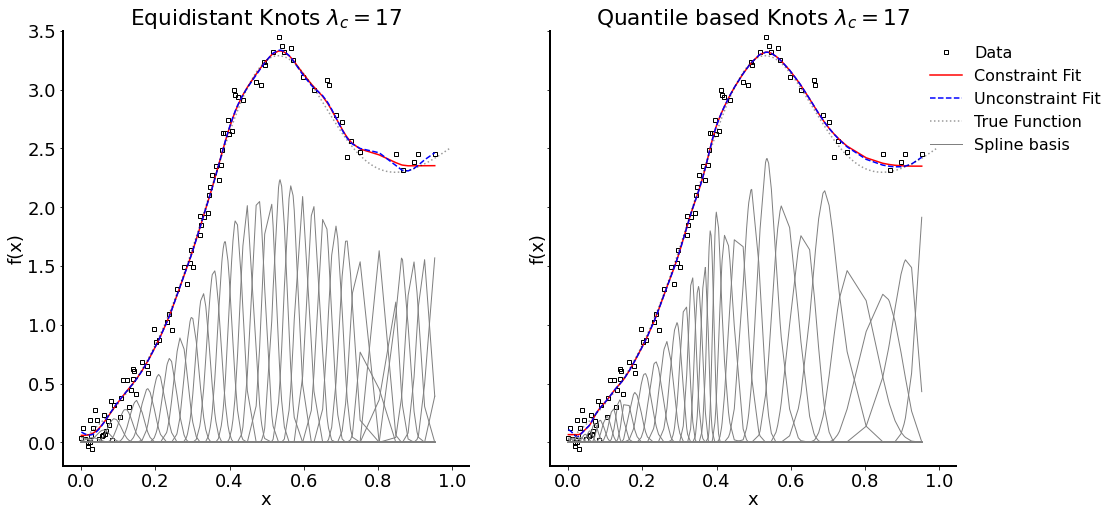

In [99]:
# Create two subplots 
np_ = 2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# plot linear based fit
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["xbeta"], df_train["fit_con_beta_equidistant"], color="red", label="Constraint Fit")
ax1.plot(df_train["xbeta"], df_train["fit_unc_beta_equidistant"], color="blue", label="Unconstraint Fit", linestyle="--")
ax1.plot(df_train["xlin"], df_train["y"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax1.set_title(r"Equidistant Knots $\lambda_c ={}$".format(Models_beta[0].smooths["s(1)"].lam["smoothness"]))
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-0.2, top=3.5)
# plot basis functions
for i in range(Models_beta[0].basis.shape[1]):
    ax1.plot(df_train["xbeta"], Models_beta[0].basis[:,i]*Models_beta[0].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax1.plot(df_train["xbeta"], Models_beta[0].basis[:,i]*Models_beta[0].coef_[i], color="grey", linewidth=1, label="Spline basis")
    
# plot quantile based fit
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["xbeta"], df_train["fit_con_beta_quantile"], color="red", label="Constraint Fit")
ax2.plot(df_train["xbeta"], df_train["fit_unc_beta_quantile"], color="blue", label="Unconstraint Fit", linestyle="--")
ax2.plot(df_train["xlin"], df_train["y"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax2.set_title(r"Quantile based Knots $\lambda_c = {}$".format(Models_beta[1].smooths["s(1)"].lam["smoothness"]))
ax2.set_ylabel("f(x)", labelpad=2)
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-0.2, top=3.5)
for i in range(Models_beta[1].basis.shape[1]):
    ax2.plot(df_train["xbeta"], Models_beta[1].basis[:,i]*Models_beta[1].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax2.plot(df_train["xbeta"], Models_beta[1].basis[:,i]*Models_beta[1].coef_[i], color="grey", linewidth=1, label="Spline basis")

ax2.legend(bbox_to_anchor=(0.9, 1.), loc="upper left", frameon=False, fontsize=16)
    

### **Block for plots includeing the violated constraints for fitted values and coefficients** for Skewed data

Left Skewed Data Distribution


C:\Users\WeberJ\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:115: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



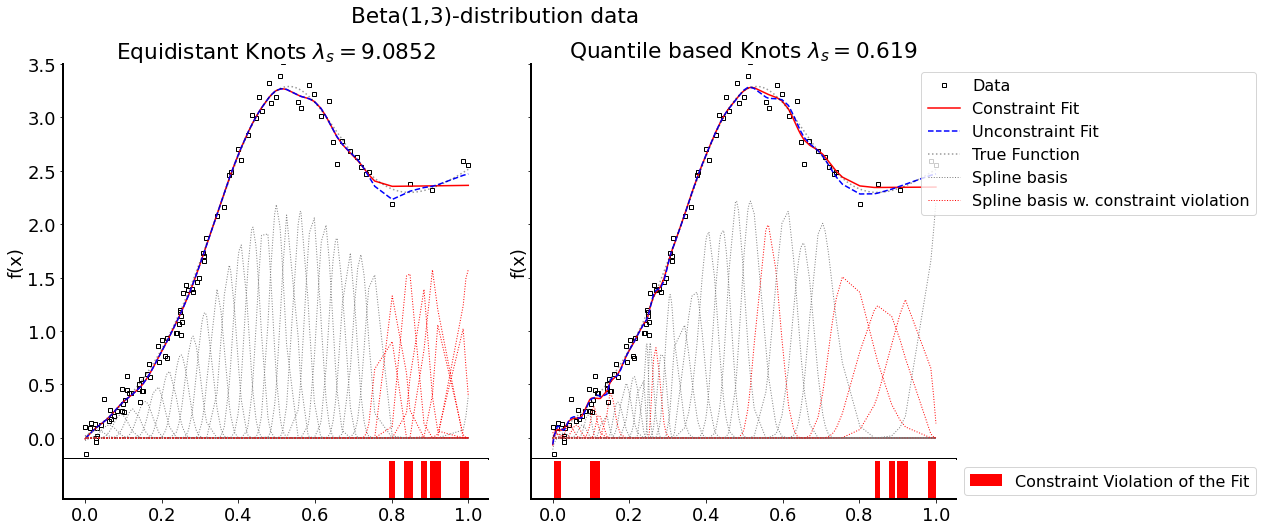

In [105]:
cfit_equidistant = np.diag(check_constraint(df_train["fit_con_beta_equidistant"],
                                            constraint="peak",
                                            smooth_type=type(Models_beta[0].smooths["s(1)"])))

cfit_quantile = np.diag(check_constraint(df_train["fit_con_beta_quantile"], 
                                         constraint="peak", 
                                         smooth_type=type(Models_beta[1].smooths["s(1)"])))

ccoef_equidistant = list(
    np.diag(check_constraint(Models_beta[0].coef_, 
                             constraint="peak", 
                             smooth_type=type(Models_beta[0].smooths["s(1)"])))) + [0]
ccoef_quantile = list(
    np.diag(v=check_constraint(Models_beta[1].coef_, 
                               constraint="peak", 
                               smooth_type=type(Models_beta[1].smooths["s(1)"])))) + [0]

##########################################################################
##########################################################################
## PLOT
##########################################################################
##########################################################################

f, axs = plt.subplots(2, 2, sharey="row", sharex="col", figsize=(16,8),
                      gridspec_kw={"hspace": 0, "wspace":0.1, "width_ratios":[1,1], 
                                   "height_ratios":[1,0.1]})
((ax11, ax12), (ax21, ax22)) = axs

# remove the splines from all subwindows
for ax in axs.ravel():
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
# remove the tick labels for the constraint violation plot
ax21.yaxis.set_ticks([])
##########################################################################
##########################################################################
## plot the data
##########################################################################
##########################################################################
np_ = 2 if n==250 else 25
ax11.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax11.plot(df_train["xbeta"], df_train["fit_con_beta_equidistant"], color="red", label="Constraint Fit")
ax11.plot(df_train["xbeta"], df_train["fit_unc_beta_equidistant"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax11.plot(df_train["xlin"], df_train["y"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax11.set_title(r"Equidistant Knots $\lambda_s ={}$".format(round(Models_beta[0].smooths["s(1)"].lam["smoothness"], 4)))
ax11.set_ylabel("f(x)", labelpad=2)
ax11.set_xlabel("x", labelpad=0)
ax11.set_ylim(bottom=-0.2, top=3.5)
# plot basis functions
for i in range(Models_beta[0].basis.shape[1]):
    if ccoef_equidistant[i]:
        ax11.plot(df_train["xbeta"], Models_beta[0].basis[:,i]*Models_beta[0].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax11.plot(df_train["xbeta"], Models_beta[0].basis[:,i]*Models_beta[0].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")

# plot quantile based fit
ax12.spines["right"].set_visible(False)
ax12.spines["top"].set_visible(False)

ax12.plot(df_train["xbeta"][::np_], df_train["ybeta"][::np_], color="black", label="Data", 
          marker="s", markersize=4, 
          markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax12.plot(df_train["xbeta"], df_train["fit_con_beta_quantile"], color="red", label="Constraint Fit")
ax12.plot(df_train["xbeta"], df_train["fit_unc_beta_quantile"], color="blue", label="Unconstraint Fit", 
          linestyle="--")
ax12.plot(df_train["xlin"], df_train["y"], color="black", linestyle=":",alpha=0.4, label="True Function")
ax12.set_title(r"Quantile based Knots $\lambda_s = {}$".format(round(Models_beta[1].smooths["s(1)"].lam["smoothness"], 4)))
ax12.set_ylabel("f(x)", labelpad=2)
ax12.set_xlabel("x", labelpad=0)
ax12.set_ylim(bottom=-0.2, top=3.5)
for i in range(Models_beta[1].basis.shape[1]):
    if ccoef_quantile[i]:
        ax12.plot(df_train["xbeta"], Models_beta[1].basis[:,i]*Models_beta[1].coef_[i], 
                  color="red", linewidth=1, linestyle=":")
    else:
        ax12.plot(df_train["xbeta"], Models_beta[1].basis[:,i]*Models_beta[1].coef_[i], 
                  color="grey", linewidth=1, linestyle=":")
ax12.plot(0, 0, color="grey", linewidth=1, linestyle=":", label="Spline basis")
ax12.plot(0, 0, color="red", linewidth=1, linestyle=":", label="Spline basis w. constraint violation")

ax12.legend(bbox_to_anchor=(0.9, 1.), loc="upper left", frameon=True, fontsize=16, )

#plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_left_skewed_data_seed_{}.png'.format(seed), transparent=False, bbox_inches='tight')
##########################################################################
##########################################################################
## plot the constraint violation for fit
##########################################################################
##########################################################################
ax21.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_equidistant, width=0.015)
ax22.bar(x=df_train["xbeta"].values[:-1], color="red", 
         height=cfit_quantile, width=0.015, label="Constraint Violation of the Fit")
ax22.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=True, fontsize=16)

plt.suptitle(r"Beta({},{})-distribution data".format(beta_a, beta_b))

path = "..\\..\\Thesis_WorkingDirectory\\thesisplots\\"
if experiment=="l":
    fname = "exp_left_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Left Skewed Data Distribution")
elif experiment=="m":
    fname = "exp_middle_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Middle Skewed Data Distribution")
elif experiment=="r":
    fname = "exp_right_skewed_data_ndata_{}_rseed_{}".format(n, seed)
    print("Right Skewed Data Distribution")

plt.savefig(path+fname+".png", transparent=False, bbox_inches='tight')

f.show()

### **Equidistant vs Quantile Based for LINEAR SPACED DATA**

In [44]:
n_param = 35
Models_lin = []
print("Linear space data")
for grid in ["equidistant", "quantile"]:
    m_unc_linsp = (("s(1)", "none", n_param, (1, 0), grid),)
    M_unc_linsp = StarModel(description=m_unc_linsp)
    M_unc_linsp.GCV_smoothingParameter(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"], n_grid=25)
    best_lam_s_linsp = M_unc_linsp.smooths["s(1)"].lam["smoothness"]
    lam_c_linsp = 1000*best_lam_s_linsp
    print(f"Best smoothing parameter for {grid} is {M_unc_linsp.smooths['s(1)'].lam}")
    
    M_unc_linsp = StarModel(description=(("s(1)", "none", n_param, (best_lam_s_linsp, 0), grid),))
    M_unc_linsp.fit(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"],plot_=False)
    yfit_unc_linsp = M_unc_linsp.basis @ M_unc_linsp.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xlin"].values, k=M_unc_linsp.coef_list[-1])
    ypred_unc = B.basis @ M_unc_linsp.coef_

    if best_lam_s_linsp < 6:
        #best_lam_s_linsp = 6
        lam_c_linsp = 6000
        print("Smoothing Parameter low -> lam_c set to 6000!")

    # Constraint Model peak
    m_con_linsp = (("s(1)", "peak", 35, (best_lam_s_linsp, lam_c_linsp), grid), )
    M_con_linsp = StarModel(description=m_con_linsp)

    M_con_linsp.fit(X=df_train["xlin"].values.reshape(-1,1), y=df_train["ylin"], plot_=False)
    yfit_con_linsp = M_con_linsp.basis @ M_con_linsp.coef_

    B = Bspline()
    B.bspline_basis(x_data=df_test["xlin"].values, k=M_con_linsp.coef_list[-1])
    ypred_con_linsp = B.basis @ M_con_linsp.coef_
    
    df_train["fit_unc_linspace_"+grid] = yfit_unc_linsp
    df_train["fit_con_linspace_"+grid] = yfit_con_linsp
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=df_train["ylin"], mode="markers", marker=dict(size=6, symbol=101, color="black"), name="Noisy samples"))
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=yfit_con_linsp, mode="markers+lines", marker=dict(size=3, symbol=1, color="green"), name="CONSTRAINT Fit"))
    fig.add_trace(go.Scatter(x=df_train["xlin"], y=yfit_unc_linsp, mode="markers+lines", marker=dict(size=3, symbol=1, color="red"), name="Unconstraint Fit"))
    for i in range(M_con_linsp.basis.shape[1]):
        fig.add_trace(go.Scatter(x=df_train["xlin"], y=M_con_linsp.basis[:,i] * M_con_linsp.coef_[i], mode="lines", line=dict(color="grey", width=1), name=None))
    #fig.show()
    
    Models_lin.append(M_con_linsp)

    
print("Equidistant knot Model: ".center(50, "-"), "\n", Models_lin[0])
print("Quantile knot Model: ".center(50, "-"), "\n", Models_lin[1])

In [44]:
np_ = 1
# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# plot linear based fit
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.plot(df_train["xlin"][::np_], df_train["ylin"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax1.plot(df_train["xlin"], df_train["fit_con_linspace_equidistant"], color="red", label="Constraint Fit", linestyle="--")
ax1.plot(df_train["xlin"], df_train["fit_unc_linspace_equidistant"], color="blue", label="Unconstraint Fit")
ax1.set_title(r"Equidistant Knots")
ax1.set_ylabel("f(x)", labelpad=2)
ax1.set_xlabel("x", labelpad=0)
ax1.set_ylim(bottom=-0.2, top=3.5)
# plot basis functions
for i in range(Models_lin[0].basis.shape[1]):
    ax1.plot(df_train["xlin"], Models_lin[0].basis[:,i]*Models_lin[0].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax1.plot(df_train["xlin"], Models_lin[0].basis[:,i]*Models_lin[0].coef_[i], color="grey", linewidth=1, label="Spline basis")
    
# plot quantile based fit
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax2.plot(df_train["xlin"][::np_], df_train["ylin"][::np_], color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax2.plot(df_train["xlin"], df_train["fit_con_linspace_quantile"], color="red", label="Constraint Fit", linestyle="--")
ax2.plot(df_train["xlin"], df_train["fit_unc_linspace_quantile"], color="blue", label="Unconstraint Fit")
ax2.set_title(r"Quantile based Knots")
ax2.set_ylabel("f(x)", labelpad=2)
ax2.set_xlabel("x", labelpad=0)
ax2.set_ylim(bottom=-0.2, top=3.5)
for i in range(Models_lin[1].basis.shape[1]):
    ax2.plot(df_train["xlin"], Models_lin[1].basis[:,i]*Models_lin[1].coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax2.plot(df_train["xlin"], Models_lin[1].basis[:,i]*Models_lin[1].coef_[i], color="grey", linewidth=1, label="Spline basis")

ax2.legend(bbox_to_anchor=(0.8, 1.1), loc="upper left", frameon=False, fontsize=16)

plt.savefig('..\\..\\Thesis_WorkingDirectory\\thesisplots\\exp_linspace_Data.png', transparent=False, bbox_inches='tight')

### Table for Datapoint 

## **INCREASING EXAMPLE**


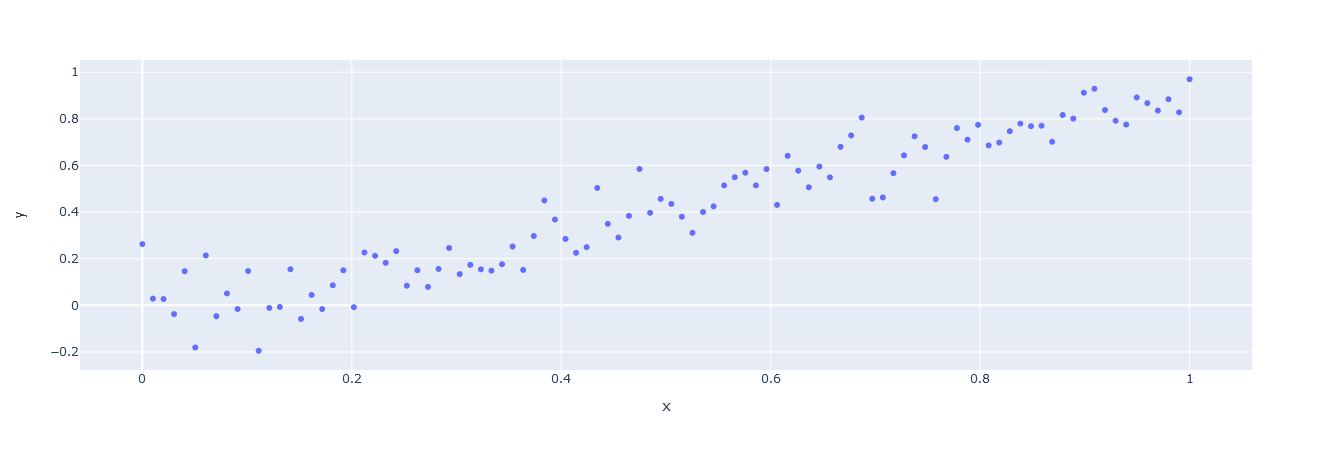

In [81]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.1) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [80]:
m = (("s(1)", "inc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [26]:
minc = (("s(1)", "inc", 20, (0.01, 6000), "equidistant"),)
Minc = StarModel(description=minc).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [32]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredinc = Minc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) < 0
cc_constr = np.diff(ypredinc, 1) < -0.000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.225
Percentage of predictions that violate the constraint for constraint fit: 	 0.081


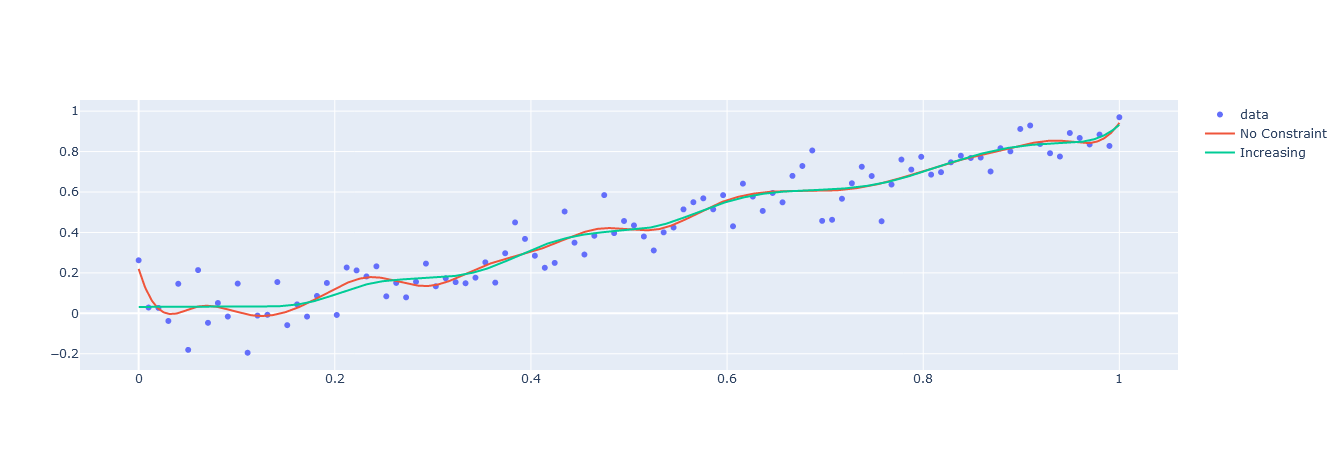

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredinc, mode="lines", name="Increasing"))

## **DECREASING EXAMPLE**

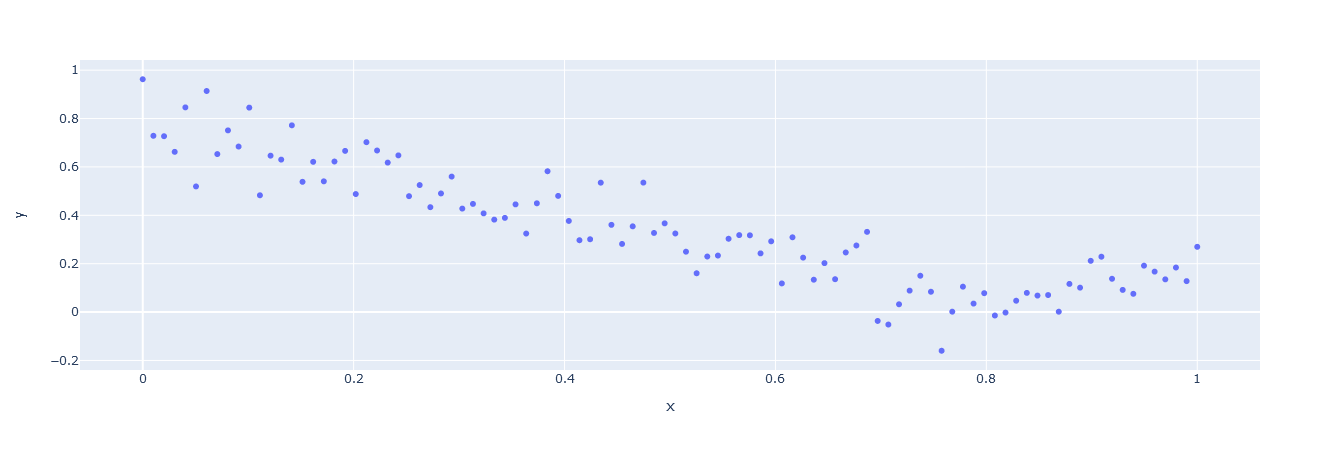

In [74]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.8) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [75]:
m = (("s(1)", "dec", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [76]:
mdec = (("s(1)", "dec", 20, (0.01, 6000), "equidistant"),)
Mdec = StarModel(description=mdec).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [77]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypreddec = Mdec.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) > 0.0001
cc_constr = np.diff(ypreddec, 1) > 0.0001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.318
Percentage of predictions that violate the constraint for constraint fit: 	 0.0


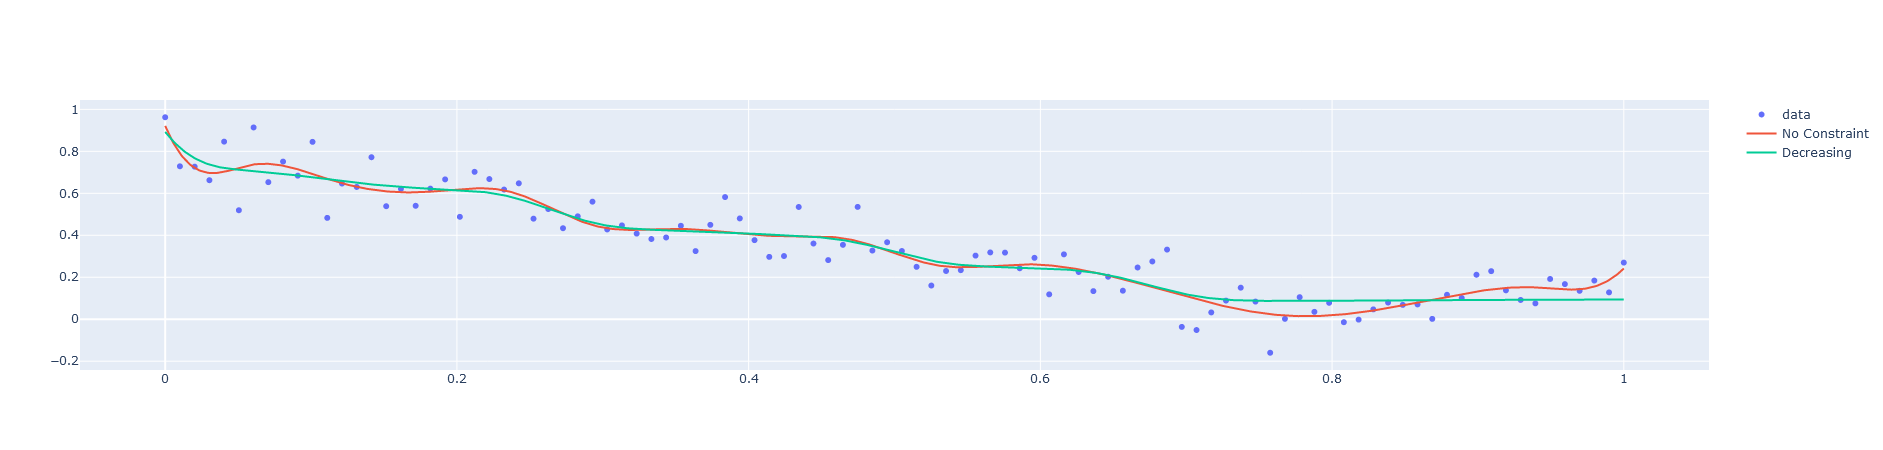

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypreddec, mode="lines", name="Decreasing"))

## **CONCAVE EXAMPLE**

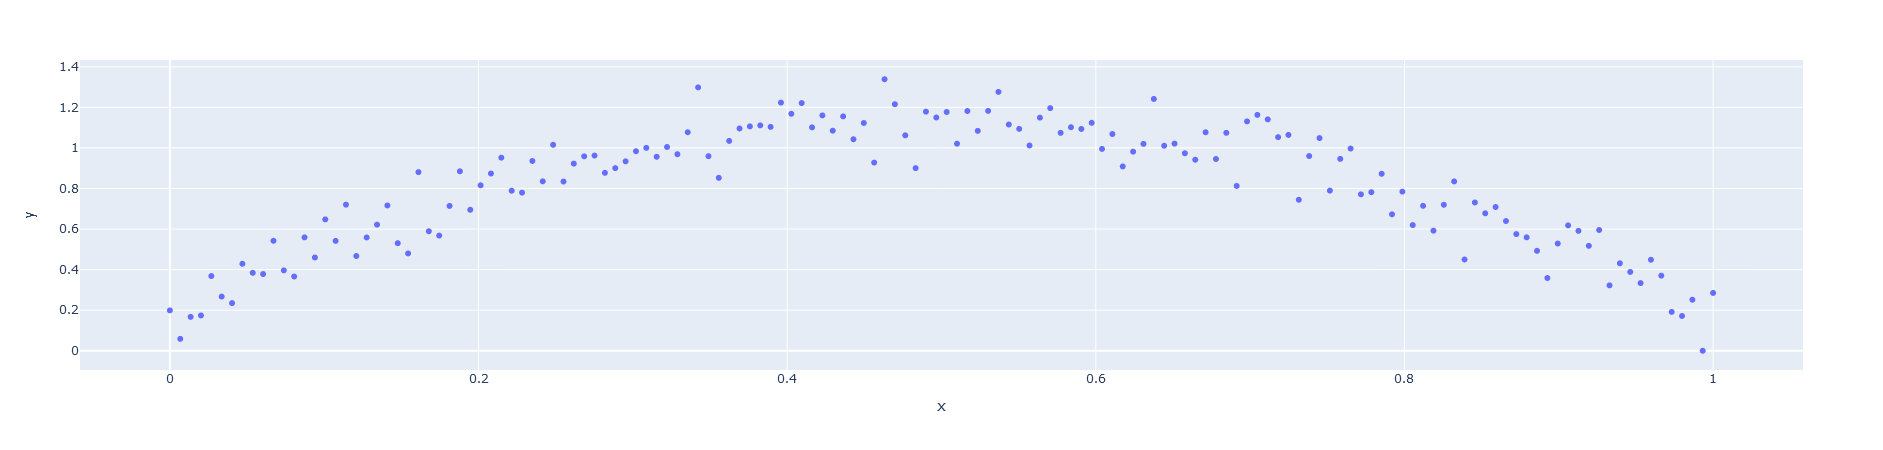

In [68]:
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconcave = -1*yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconcave)

In [69]:
m = (("s(1)", "conc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [70]:
mconc = (("s(1)", "conc", 20, (0.01, 60000), "equidistant"),)
Mconc = StarModel(description=mconc).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [71]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconc = Mconc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.507
Percentage of predictions that violate the constraint for constraint fit: 	 0.116


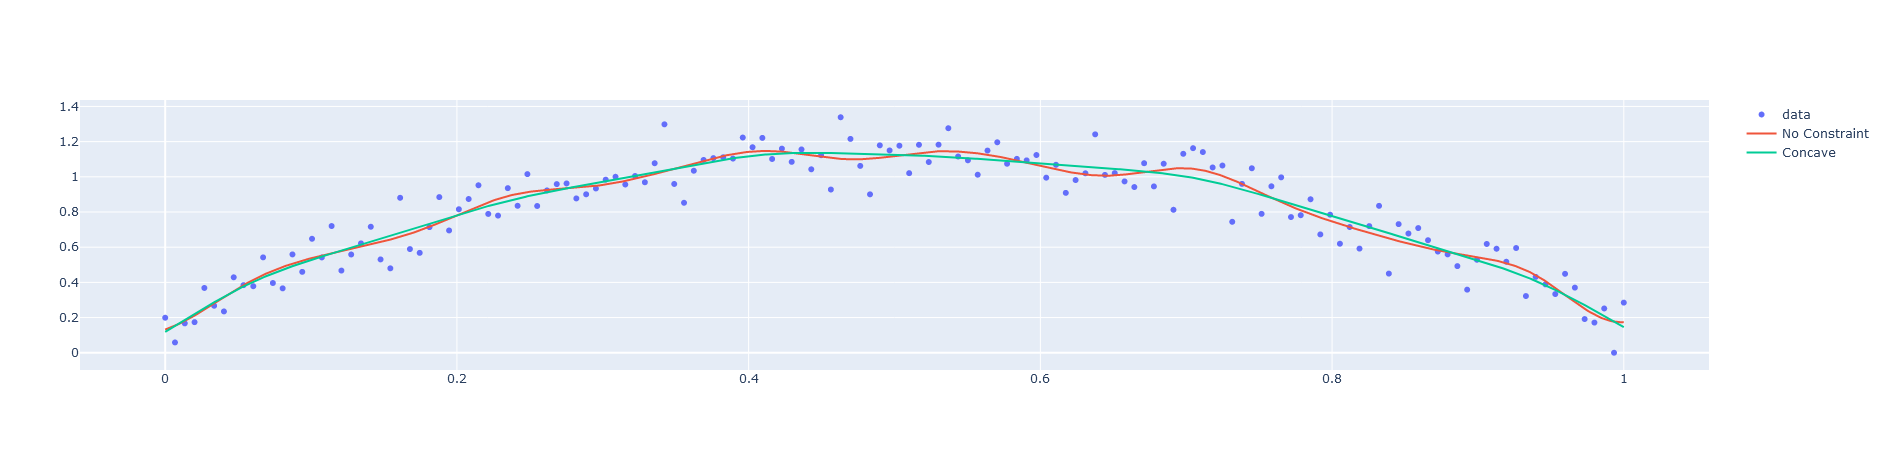

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yconcave, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconc, mode="lines", name="Concave"))

## **CONVEX EXAMPLE**

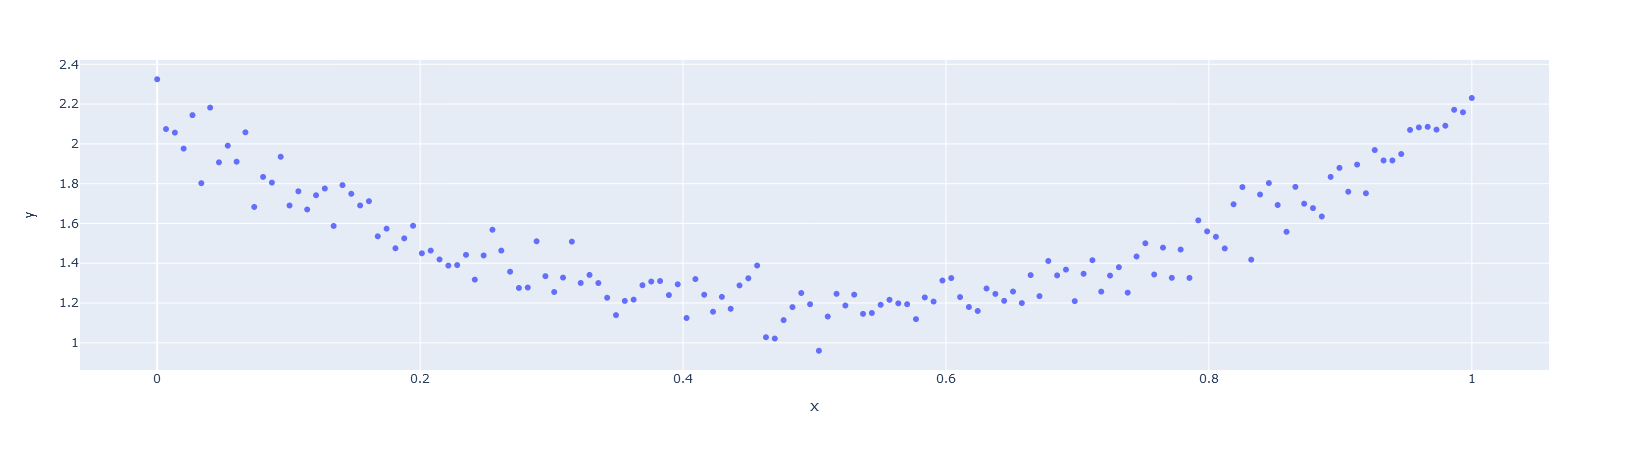

In [47]:
np.random.seed(1)
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconvex = yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconvex)

In [50]:
m = (("s(1)", "conv", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconvex, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [49]:
mconv = (("s(1)", "conv", 20, (0.01, 60000), "equidistant"),)
Mconv = StarModel(description=mconv).fit(X=x.reshape(-1,1), y=yconvex, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [51]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconv = Mconv.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.579
Percentage of predictions that violate the constraint for constraint fit: 	 0.116


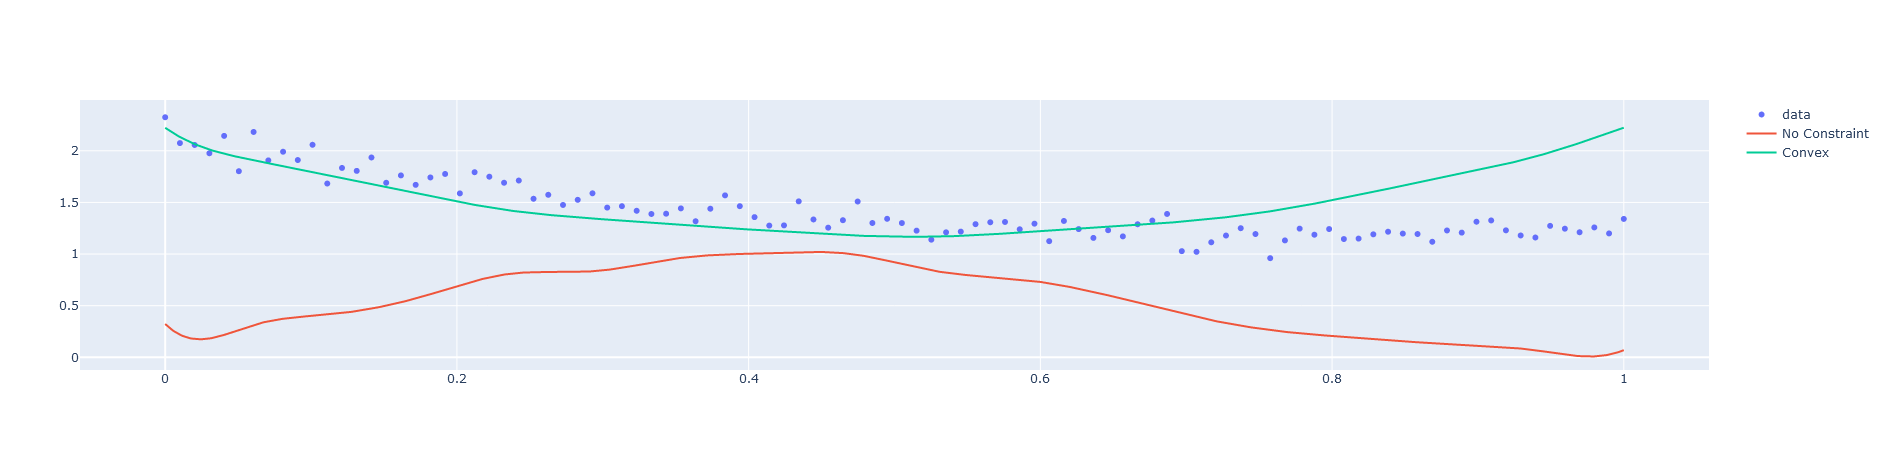

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yconvex, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconv, mode="lines", name="Convex"))

## **PEAK EXAMPLE**

In [53]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

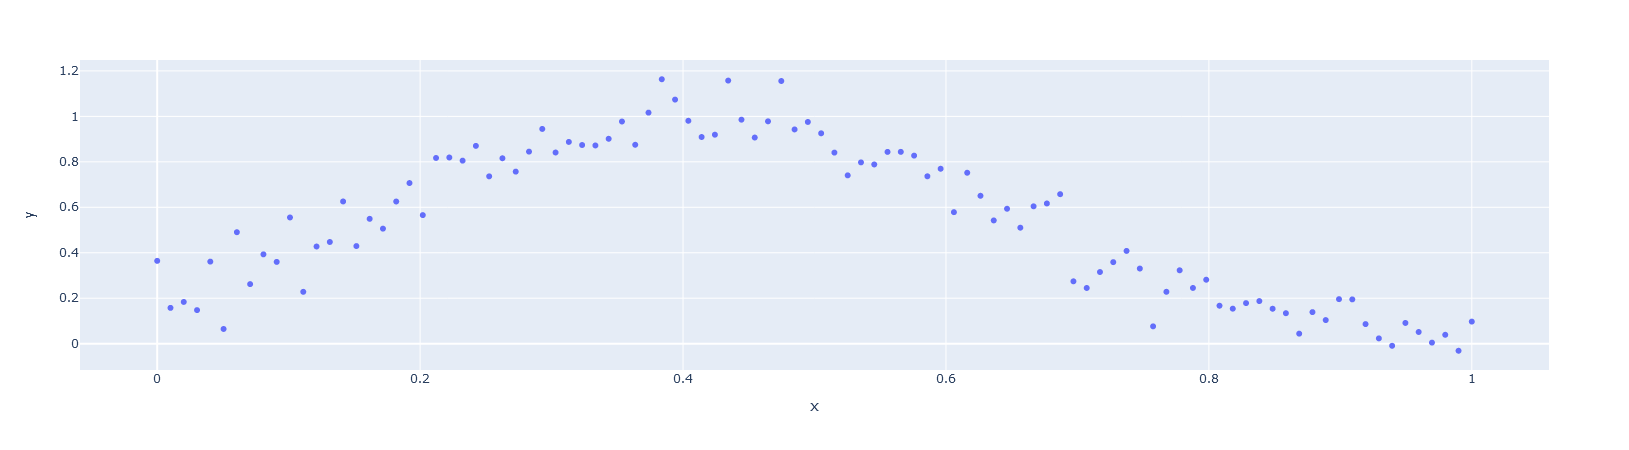

In [54]:
np.random.seed(1)
x = np.linspace(0,1,100)
ypeak = np.exp(-(x-0.4)**2/0.1) + np.random.normal(scale=0.1, size=len(x)) #+ 0.5*x**1.2
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=ypeak)

In [63]:
m = (("s(1)", "peak", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [62]:
mpeak = (("s(1)", "peak", 20, (0.01, 6000), "equidistant"),)
Mpeak = StarModel(description=mpeak).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [61]:
mpeakconc = (("s(1)", "conc", 20, (0.01, 6000), "equidistant"),)
Mpeakconc = StarModel(description=mpeakconc).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [58]:
from stareg.utils import check_constraint_peak

ypred = M.predict(X=xtest.reshape(-1,1))
ypredpeak = Mpeak.predict(X=xtest.reshape(-1,1))
ypredpeakconc = Mpeakconc.predict(X=xtest.reshape(-1,1))

cc = check_constraint_peak(ypred)
cc_constr = check_constraint_peak(ypredpeak)
cc_constr_ = check_constraint_peak(ypredpeakconc)

print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit using peak constraint: \t", round(sum(cc_constr) / len(cc_constr), 9))
print("Percentage of predictions that violate the constraint for constraint fit using concav constraint: \t", round(sum(cc_constr_) / len(cc_constr_), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.061
Percentage of predictions that violate the constraint for constraint fit using peak constraint: 	 0.0
Percentage of predictions that violate the constraint for constraint fit using concav constraint: 	 0.056


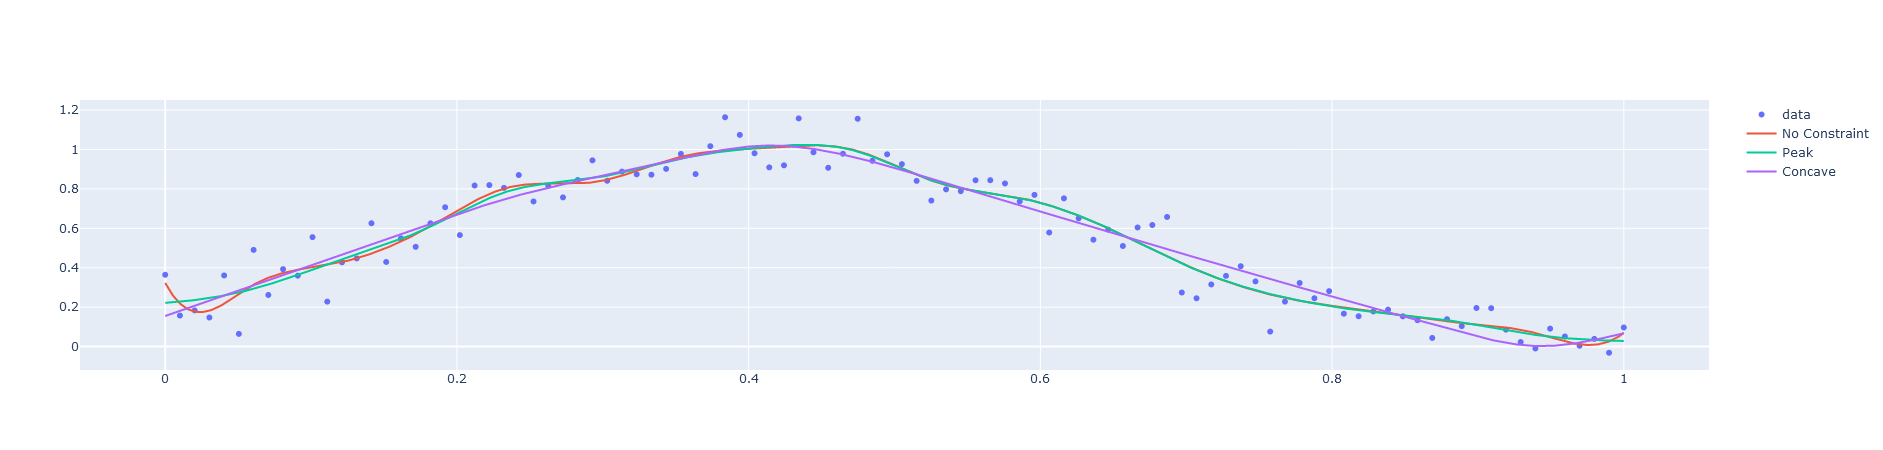

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=ypeak, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredpeak, mode="lines", name="Peak"))
fig.add_trace(go.Scatter(x=xtest, y=ypredpeakconc, mode="lines", name="Concave"))